# **Prédiction et Optimisation de la Viralité des Vidéos sur les Réseaux Sociaux**

**Objectif du projet**:
Ce projet vise à aider les créateurs et entreprises à estimer la viralité de leurs vidéos sur des plateformes comme TikTok et YouTube, en prédisant des métriques d'engagement (vues, likes, commentaires) et en fournissant des recommandations pour optimiser la performance. Les données utilisées proviennent du dataset `youtube_shorts_tiktok_trends_2025.csv`, contenant des métadonnées (hashtags, titres, catégories) et des métriques d'engagement

**Importation des bibliothèques nécessaires**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import unidecode
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split

**Chargement du Dataset**

In [2]:
df = pd.read_csv("youtube_shorts_tiktok_trends_2025_uncleaned.csv")

**Intégration du dictionnaire des données**

In [3]:
dict_data = pd.read_csv("DATA_DICTIONARY.csv")
print("Aperçu du dictionnaire de données :")
display(dict_data.head(10))


Aperçu du dictionnaire de données :


,column,description
0,platform,Platform (TikTok/YouTube)
1,country,Country ISO-2 code
2,region,Region macro label (if available)
3,language,Primary language inferred from country (fallba...
4,category,Video category (if available)
5,hashtag,Primary hashtag aligned with genre
6,title_keywords,Short realistic title-like keywords
7,author_handle,"Creator handle/channel (brand-like, synthetic)"
8,sound_type,Sound type (if present)
9,music_track,Music track (if present)


**Exploration et aperçu des Données**

In [4]:
df.columns

Index(['platform', 'country', 'region', 'language', 'category', 'hashtag',
       'title_keywords', 'author_handle', 'sound_type', 'music_track',
       'week_of_year', 'duration_sec', 'views', 'likes', 'comments', 'shares',
       'saves', 'engagement_rate', 'trend_label', 'source_hint', 'notes',
       'device_type', 'upload_hour', 'genre', 'trend_duration_days',
       'trend_type', 'engagement_velocity', 'dislikes', 'comment_ratio',
       'like_dislike_ratio', 'publish_dayofweek', 'publish_period',
       'event_season', 'tags', 'sample_comments', 'creator_avg_views',
       'creator_tier', 'season', 'publish_date_approx', 'year_month', 'title',
       'title_length', 'has_emoji', 'avg_watch_time_sec', 'completion_rate',
       'device_brand', 'traffic_source', 'is_weekend', 'row_id'],
      dtype='object')

In [5]:
df.head()

,platform,country,region,language,category,hashtag,title_keywords,author_handle,sound_type,music_track,...,year_month,title,title_length,has_emoji,avg_watch_time_sec,completion_rate,device_brand,traffic_source,is_weekend,row_id
0,TikTok,Jp,Asia,ja,Gaming,#Lifestyle,Night Routine — College,NextVision,trending,8bit loop,...,2025-01,Night Routine — Productivity 🏖️,31,1,25.8,0.645,iPhone,External,1,2e681528d17a1fe1986857942536ec27
1,TikTok,Se,Europe,sv,Food,#Sports,Morning Routine — College,DailyVlogsDiego,trending,Street vibe,...,2025-01,Football skills in 60s 📱,24,1,10.4,0.578,iPhone,Search,0,2e35fa0b2978b9cae635839c1d4e9e74
2,TikTok,Za,Africa,en,Art,#Workout,Night Routine — College,BeyondHub,licensed,Gallery pad,...,2025-01,Football skills in 60s,22,0,11.7,0.532,Huawei,External,1,0d88a011235a82244995ef52961f9502
3,TikTok,Kr,Asia,ko,News,#Esports,Best Settings for Fortnite,NextHub,original,Neutral piano,...,2025-01,Pro Tips for Valorant in 60s 🎮,30,1,23.7,0.658,Huawei,Search,1,e15cff7621ed3f9eb9d2c97c841be0f3
4,TikTok,Au,Oceania,en,Beauty,#Comedy,When your friend is Beginners,LucasOfficial,licensed,Soft glam loop,...,2025-01,POV: Budget 😂,13,1,24.6,0.703,Huawei,ForYou,1,d696b4f0a50ea70e7cb5021be7e198ec


In [6]:
df.tail()

,platform,country,region,language,category,hashtag,title_keywords,author_handle,sound_type,music_track,...,year_month,title,title_length,has_emoji,avg_watch_time_sec,completion_rate,device_brand,traffic_source,is_weekend,row_id
48074,YouTube,Ke,Africa,sw,Lifestyle,#Motivation,Weekly Reset — Beginners,NoahChannel,licensed,Chill guitar,...,2025-08,How I Take Notes for Summer,27,0,30.1,0.669,iPhone,Search,0,a756bd218ad29bce51bad0fac806a857
48075,YouTube,Sa,Asia,ar,Art,#DanceChallenge,Weekly Reset — Beginners,MrYuki,trending,Gallery pad,...,2025-08,Dance With Me — Minimal,23,0,39.0,0.696,Samsung,Home,1,0aeb762f68a9867eaf0b937006933021
48076,YouTube,Kr,Asia,ko,Science,#Comedy,When your friend is 2025,LifeOfAyaka,original,Lab beeps,...,2025-08,If Summer was honest,20,0,28.6,0.622,Xiaomi,Suggested,1,78ebd3268e18a3033895739c44680d82
48077,YouTube,Br,South America,pt,Pets,#OOTD,GRWM: Beginners Edition,TechieNoah,trending,Cute whistle,...,2025-08,How to style Evening,20,0,30.0,0.536,Oppo,Home,1,67fd2032ade8be89da4c0208fbc05596
48078,YouTube,Pl,Europe,pl,Education,#Streamer,New Patch Tips for Fortnite,BeyondStudio,original,Calm piano,...,2025-08,Best Settings for Fortnite,26,0,13.4,0.496,Vivo,External,0,d985bcfe0e19119e396e87fbc4f7ef5d


In [7]:
df.describe()

,week_of_year,duration_sec,views,likes,comments,shares,saves,engagement_rate,upload_hour,trend_duration_days,engagement_velocity,dislikes,comment_ratio,like_dislike_ratio,creator_avg_views,title_length,has_emoji,avg_watch_time_sec,completion_rate,is_weekend
count,48079.000000,48079.000000,4.807900e+04,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000
mean,18.234260,34.489320,9.929276e+04,5737.732108,628.657314,553.484494,591.071487,0.075415,15.986751,13.742923,13889.926787,245.070759,0.006310,36.314111,99208.507637,22.898688,0.460388,21.662460,0.635308,0.622995
std,9.996924,16.401608,1.318522e+05,8639.923653,967.782704,849.436172,978.280616,0.030091,5.489399,13.343582,24260.729552,416.436983,0.002969,33.057494,16405.006062,4.446883,0.498434,10.583019,0.112604,0.484641
min,1.000000,5.000000,7.940000e+02,33.000000,3.000000,3.000000,2.000000,0.014720,0.000000,3.000000,35.310000,0.000000,0.000975,6.142857,44841.300000,9.000000,0.000000,2.800000,0.400000,0.000000
25%,10.000000,22.000000,3.032250e+04,1526.000000,160.000000,143.000000,138.000000,0.052326,13.000000,5.000000,2628.560000,53.000000,0.004058,14.529986,88495.000000,20.000000,0.000000,14.000000,0.548000,0.000000
50%,18.000000,31.000000,5.962000e+04,3167.000000,339.000000,301.000000,301.000000,0.071575,17.000000,7.000000,6490.550000,121.000000,0.005809,26.018868,97585.700000,23.000000,0.000000,19.400000,0.635000,1.000000
75%,27.000000,43.000000,1.180945e+05,6618.000000,720.000000,635.000000,659.500000,0.094794,20.000000,17.000000,15533.535000,272.000000,0.008016,42.906458,107658.000000,26.000000,1.000000,27.000000,0.724000,1.000000
max,35.000000,90.000000,3.080686e+06,310916.000000,31776.000000,29004.000000,29679.000000,0.235819,23.000000,60.000000,698214.000000,15029.000000,0.023668,199.517241,222935.400000,36.000000,1.000000,67.300000,0.850000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48079 entries, 0 to 48078
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   platform             48079 non-null  object 
 1   country              48079 non-null  object 
 2   region               48079 non-null  object 
 3   language             48079 non-null  object 
 4   category             48079 non-null  object 
 5   hashtag              48079 non-null  object 
 6   title_keywords       48079 non-null  object 
 7   author_handle        48079 non-null  object 
 8   sound_type           48079 non-null  object 
 9   music_track          48079 non-null  object 
 10  week_of_year         48079 non-null  int64  
 11  duration_sec         48079 non-null  int64  
 12  views                48079 non-null  int64  
 13  likes                48079 non-null  int64  
 14  comments             48079 non-null  int64  
 15  shares               48079 non-null 

# **Partie 1: Nettoyage de données**

### **Gestion des doublons**


1- Detection des doublons

In [9]:
print("Nombre de doublons:", df.duplicated().sum())

Nombre de doublons: 0


Dans notre dataset on n'a pas détécter des valeurs manquantes


In [10]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[(df[numeric_cols] < 0).any(axis=1)]

,platform,country,region,language,category,hashtag,title_keywords,author_handle,sound_type,music_track,...,year_month,title,title_length,has_emoji,avg_watch_time_sec,completion_rate,device_brand,traffic_source,is_weekend,row_id


ce code est pour détecter les valuers négatives pour les colonnes numériques

## **Gestion des valeurs manquantes**

In [11]:
print("Valeurs manquantes:", df.isnull().sum())

Valeurs manquantes: platform               0
country                0
region                 0
language               0
category               0
hashtag                0
title_keywords         0
author_handle          0
sound_type             0
music_track            0
week_of_year           0
duration_sec           0
views                  0
likes                  0
comments               0
shares                 0
saves                  0
engagement_rate        0
trend_label            0
source_hint            0
notes                  0
device_type            0
upload_hour            0
genre                  0
trend_duration_days    0
trend_type             0
engagement_velocity    0
dislikes               0
comment_ratio          0
like_dislike_ratio     0
publish_dayofweek      0
publish_period         0
event_season           0
tags                   0
sample_comments        0
creator_avg_views      0
creator_tier           0
season                 0
publish_date_approx    0
year_

ce code indique que notre dataset ne contient pas des valeurs manquantes

**Visualisation de données**

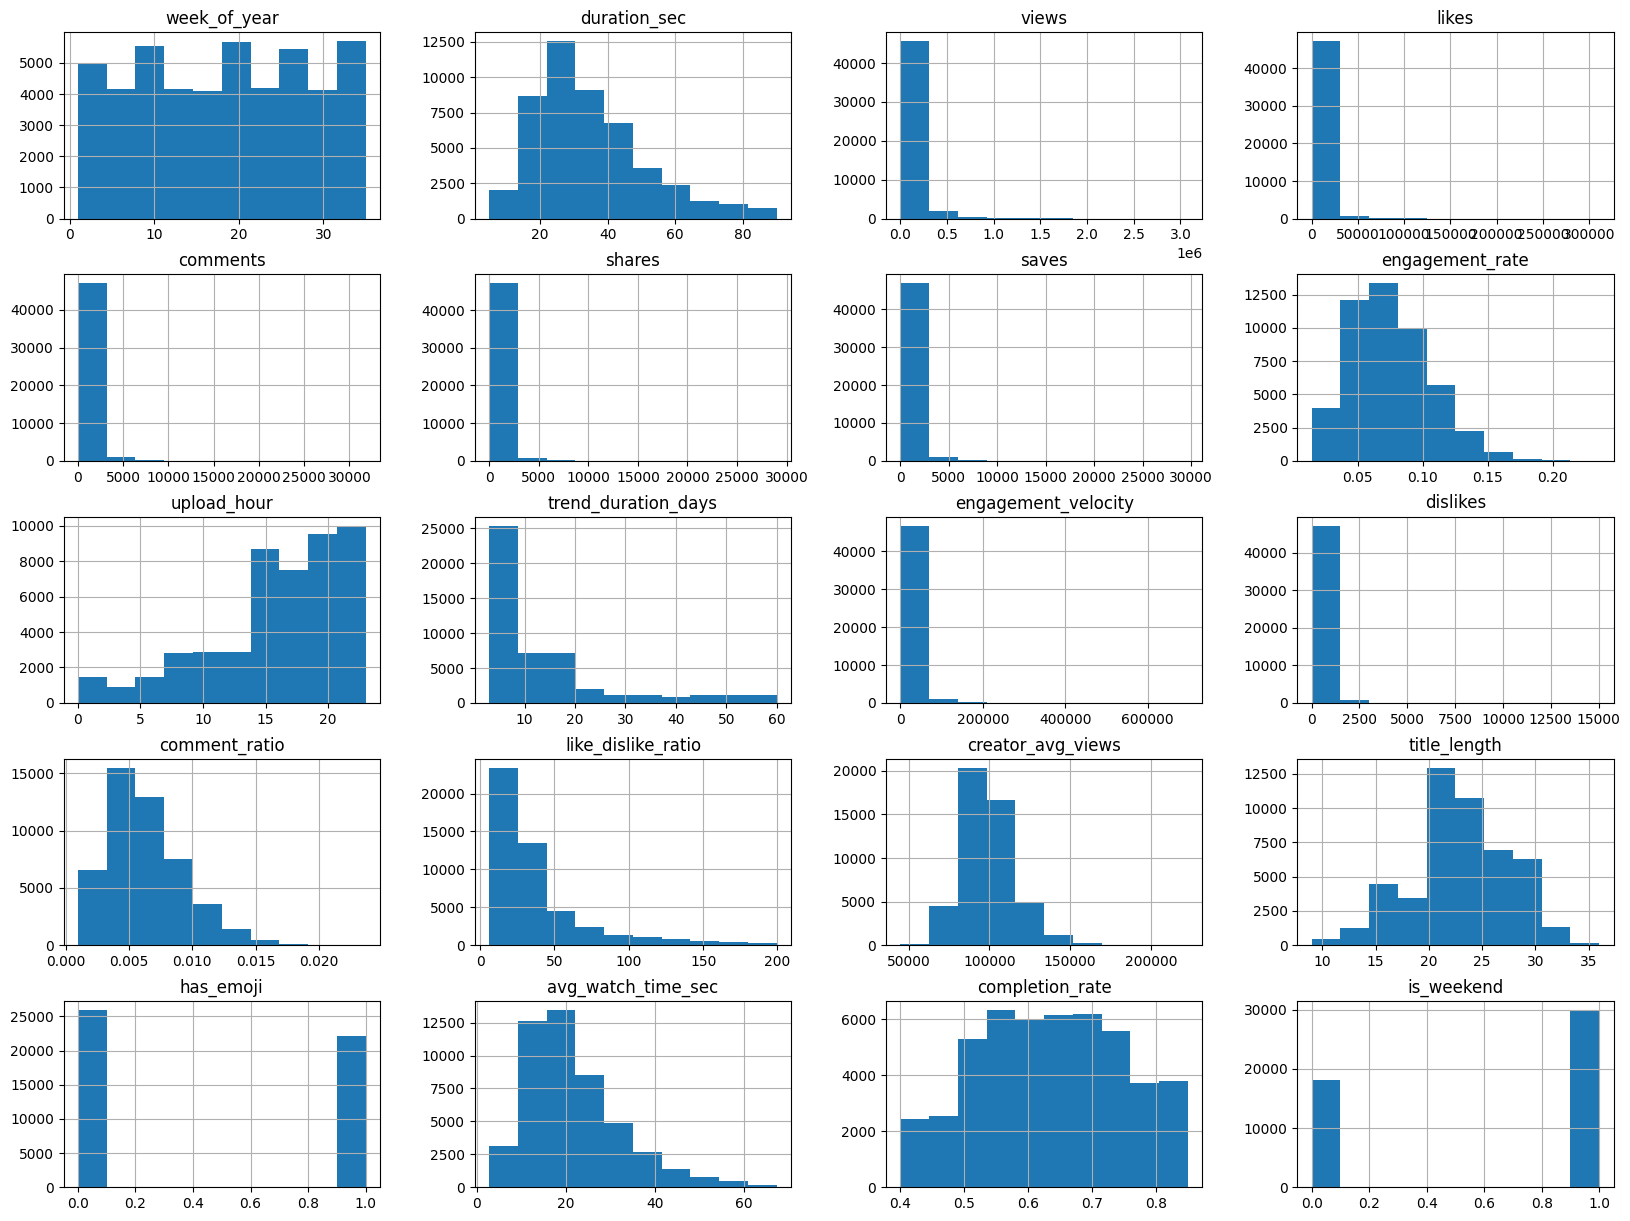

In [12]:
df.hist(figsize=(20,15))
plt.show()

### **Partie 2: Transformation de données**

**Colonnes à supprimer**

In [13]:
cols_to_drop_now = [
    "creator_tier",
    "row_id",
    "source_hint",
    "sample_comments",
    "notes",
    "title_keywords",
    "year_month",        # sera extrait depuis publish_date_approx
]
df.drop(columns=cols_to_drop_now, inplace=True, errors='ignore')

# Vérification
print("Colonnes supprimées avec succès.")
print("Nombre de colonnes restantes :", len(df.columns))

Colonnes supprimées avec succès.
Nombre de colonnes restantes : 42




*  Uniformiser les noms de colonnes (views, likes, comments ..)


In [14]:
# Uniformiser les noms de colonnes
df.columns = (
    df.columns
    .str.strip()               # Supprime les espaces avant/après
    .str.lower()               # Tout en minuscules
    .str.replace(' ', '_')     # Remplace les espaces par underscore
    .str.replace('-', '_')     # Remplace les tirets par underscore
)

In [15]:
print(df.columns.tolist())

['platform', 'country', 'region', 'language', 'category', 'hashtag', 'author_handle', 'sound_type', 'music_track', 'week_of_year', 'duration_sec', 'views', 'likes', 'comments', 'shares', 'saves', 'engagement_rate', 'trend_label', 'device_type', 'upload_hour', 'genre', 'trend_duration_days', 'trend_type', 'engagement_velocity', 'dislikes', 'comment_ratio', 'like_dislike_ratio', 'publish_dayofweek', 'publish_period', 'event_season', 'tags', 'creator_avg_views', 'season', 'publish_date_approx', 'title', 'title_length', 'has_emoji', 'avg_watch_time_sec', 'completion_rate', 'device_brand', 'traffic_source', 'is_weekend']


Résultat:Tous les noms sont en minuscules, sans espaces, sans tirets

**Uniformiser les formats de texte**

*   Supprimer les espaces inutiles
*   Convertir tout en minuscules
*   Enlever les accents et caractères spéciaux (comme é, à, ñ…)
*   Supprimer les emojis







In [16]:
import re
from unidecode import unidecode

def clean_text(text):
    if isinstance(text, str):
        text = text.strip().lower()               # enlevement des  espaces et minuscule
        text = unidecode(text)                    # enlevement des  accents
        text = re.sub(r'[^\w\s]', '', text)       # enlevement des  caractères spéciaux
        text = re.sub(r'\s+', ' ', text)          # remplacement des  espaces multiples
    return text


text_columns = ["title", "category", "genre"]
for col in text_columns:
    if col in df.columns:
        df[col] = df[col].apply(clean_text)


In [17]:
df[text_columns].head()

,title,category,genre
0,night routine productivity,gaming,lifestyle
1,football skills in 60s,food,sports
2,football skills in 60s,art,sports
3,pro tips for valorant in 60s,news,gaming
4,pov budget,beauty,comedy


Résultat :Les textes sont uniformisés, sans accents, sans emojis, propres et lisibles

**Uniformiser les formats de date**

In [18]:
df['publish_date_approx'] = pd.to_datetime(df['publish_date_approx'], errors='coerce')

# Extraction  les sous-composantes
df['year'] = df['publish_date_approx'].dt.year
df['month'] = df['publish_date_approx'].dt.month
df['day'] = df['publish_date_approx'].dt.day


In [19]:
df[['publish_date_approx', 'year', 'month', 'day']].head()

,publish_date_approx,year,month,day
0,2025-01-04,2025,1,4
1,2025-01-01,2025,1,1
2,2025-01-05,2025,1,5
3,2025-01-03,2025,1,3
4,2025-01-04,2025,1,4


Résultat : Une vraie colonne de date + 3 nouvelles colonnes numériques (year, month, day)

**Uniformiser les formats numériques (ex: “100k” → 100000)**


*   Supprimer les lettres “K”, “M”, “B”
*   Multiplier selon la valeur correspondante (K=1 000, M=1 000 000…)


In [20]:
def convert_numeric(x):
    if isinstance(x, str):
        x = x.strip().lower().replace(',', '')
        if 'k' in x:
            return float(x.replace('k', '')) * 1_000
        elif 'm' in x:
            return float(x.replace('m', '')) * 1_000_000
        elif 'b' in x:
            return float(x.replace('b', '')) * 1_000_000_000
        elif x == '':
            return None
        else:
            return float(x)
    return x

num_cols = ['views', 'likes', 'comments', 'shares', 'saves']
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].apply(convert_numeric)


In [21]:
df[num_cols].head()

,views,likes,comments,shares,saves
0,252497,21755,3170,1977,3415
1,270580,23080,2124,2108,3265
2,7385,363,33,38,69
3,72377,6243,811,383,391
4,16174,832,68,67,204


Résultat  :Toutes les valeurs sont des nombres réels (float), plus de “K” ou “M”

**Supprimer les caractères spéciaux et emojis**

*   Nettoyer le texte des symboles, émojis ou caractères non ASCII

In [22]:
import re

def remove_emojis(text):
    if isinstance(text, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols and  pictographs
            u"\U0001F680-\U0001F6FF"  # transport and  map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    return text

df['title'] = df['title'].apply(remove_emojis)


In [23]:
df['title'].head()

0      night routine productivity 
1          football skills in 60s 
2           football skills in 60s
3    pro tips for valorant in 60s 
4                      pov budget 
Name: title, dtype: object

Résultat :Les émojis et caractères spéciaux ont disparu

#Feature Engineering

**Créer des variables liées au contenu**

In [24]:
import emoji
import re

# Nettoyer les titres et détecter la présence d’emojis
df['title'] = df['title'].astype(str).str.strip()
df['has_emoji'] = df['title'].apply(lambda x: any(ch in emoji.EMOJI_DATA for ch in x))

# Longueur du titre
df['title_length'] = df['title'].apply(lambda x: len(str(x)))

# Créer un score combiné pour le titre
df['title_score'] = df['title_length'] * (1 + df['has_emoji'].astype(int))


Le titre dans notre cas joue un rôle clé dans la viralité — longueur, emojis ou ton du titre peuvent influencer la performance

**Analyser les hashtags et les tags**

In [25]:
# Nombre de hashtags
df['num_hashtags'] = df['hashtag'].apply(lambda x: len(str(x).split('#')) - 1 if pd.notnull(x) else 0)
# Nombre de tags
df['num_tags'] = df['tags'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)


Le nombre de hashtags ou de tags indique l’effort de référencement du créateur

In [26]:
def safe_divide(a, b):
    return np.where(b == 0, 0, np.round(a / b, 6))

df['engagement_total'] = df['likes'] + df['comments'] + df['shares'] + df['saves']
df['engagement_rate'] = safe_divide(df['engagement_total'], df['views'])
df['like_rate'] = safe_divide(df['likes'], df['views'])
df['dislike_rate'] = safe_divide(df['dislikes'], df['views'])
df['share_rate'] = safe_divide(df['shares'], df['views'])
df['save_rate'] = safe_divide(df['saves'], df['views'])
df['engagement_per_1k'] = safe_divide(df['engagement_total'], df['views']) * 1000


In [27]:
df[['views','likes','comments','shares','saves','engagement_total','engagement_rate','dislike_rate','engagement_per_1k']].head()


,views,likes,comments,shares,saves,engagement_total,engagement_rate,dislike_rate,engagement_per_1k
0,252497,21755,3170,1977,3415,30317,0.120069,0.004004,120.069
1,270580,23080,2124,2108,3265,30577,0.113005,0.002421,113.005
2,7385,363,33,38,69,503,0.068111,0.001625,68.111
3,72377,6243,811,383,391,7828,0.108156,0.003164,108.156
4,16174,832,68,67,204,1171,0.072400,0.001175,72.400


**Supprimer les colonnes brutes utilisées pour la création**

In [28]:
cols_to_drop_after_fe = [
    "title",
    "title_length",
    "hashtag",
    "tags",
]
df.drop(columns=cols_to_drop_after_fe, inplace=True)


Ces colonnes ont déjà été exploitées pour créer des features plus utiles

**Colonnes catégorielles à encoder**


*   event_season, publish_period, season → Label Encoding
*   platform, region, language, category, traffic_source, device_brand, genre → One-Hot Encoding


**Label Encoding**

In [29]:
label_cols = ['event_season', 'publish_period', 'season']

from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col + '_le'] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    print(f"Label encoded: {col} → {col}_le  (unique values: {df[col].nunique()})")

Label encoded: event_season → event_season_le  (unique values: 5)
Label encoded: publish_period → publish_period_le  (unique values: 4)
Label encoded: season → season_le  (unique values: 4)


**OneHot Encoding**

In [30]:
categorical_cols = [
    'platform', 'region', 'language', 'category',
    'traffic_source', 'device_brand', 'genre'
]

existing_cols = [c for c in categorical_cols if c in df.columns]
df = pd.get_dummies(df, columns=existing_cols, drop_first=False)

In [31]:
# ---------- Vérifier valeurs uniques pour toutes les colonnes importantes ----------
print("\n9) Nombre de valeurs uniques (colonnes sélectionnées):")
check_cols = ['platform','country','region','language','category','genre','device_brand']
check_cols = [c for c in check_cols if c in df.columns]
for c in check_cols:
    print(f" - {c}: {df[c].nunique()} uniques; exemples: {df[c].dropna().unique()[:6].tolist()}")


9) Nombre de valeurs uniques (colonnes sélectionnées):
 - country: 30 uniques; exemples: ['Jp', 'Se', 'Za', 'Kr', 'Au', 'Ke']


**Standardisation**

In [32]:
from sklearn.preprocessing import StandardScaler

# Colonnes numériques à standardiser
num_cols_to_scale = [
    'likes', 'comments', 'shares', 'saves', 'dislikes',
    'avg_watch_time_sec', 'completion_rate'
]

# Vérifie que toutes existent dans ton DataFrame
num_cols_to_scale = [col for col in num_cols_to_scale if col in df.columns]

# Initialisation et transformation
scaler = StandardScaler()
df[num_cols_to_scale] = scaler.fit_transform(df[num_cols_to_scale])

print("Standardisation appliquée uniquement sur les colonnes numériques pertinentes.")


Standardisation appliquée uniquement sur les colonnes numériques pertinentes.


**Métrique de corrélation**

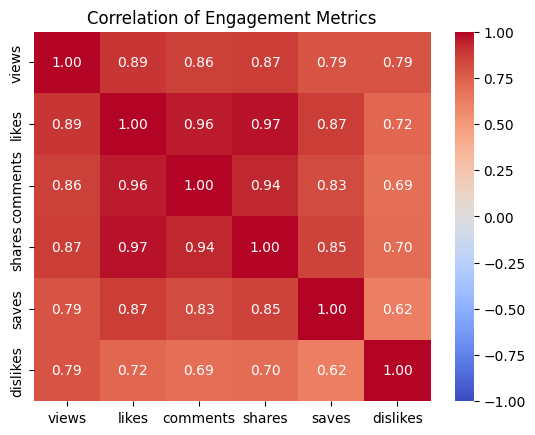

In [33]:
cand = ["views","likes","comments","shares","saves","dislikes"]
metrics = [c for c in cand if c in df.columns]
corr = df[metrics].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation of Engagement Metrics"); plt.show()

**Exploration et Analyse de données**

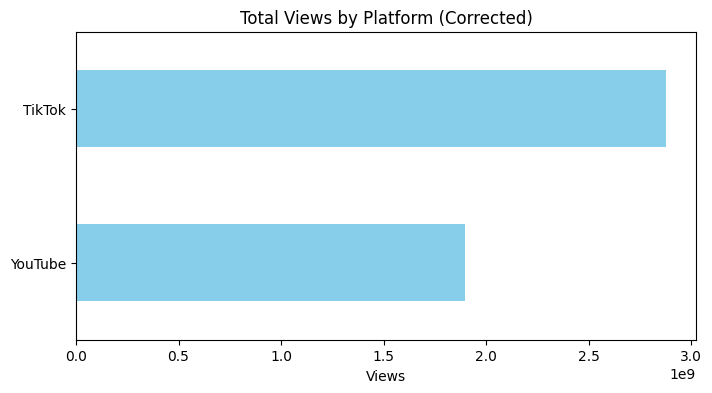

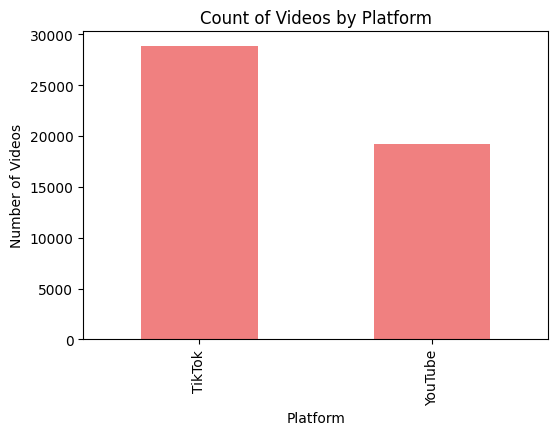

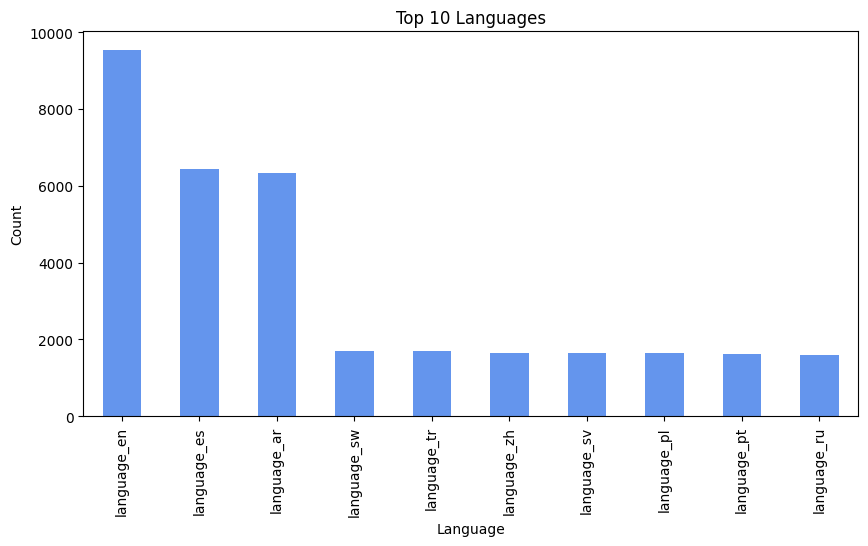

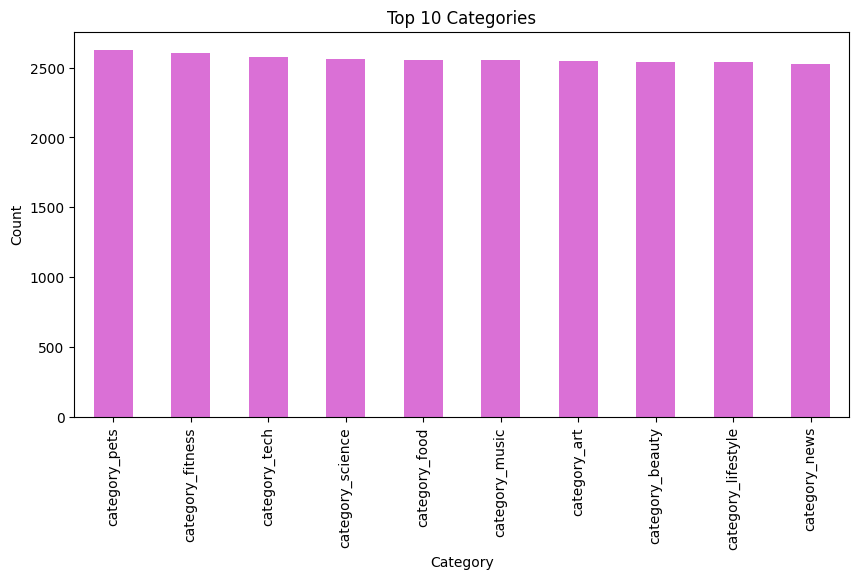

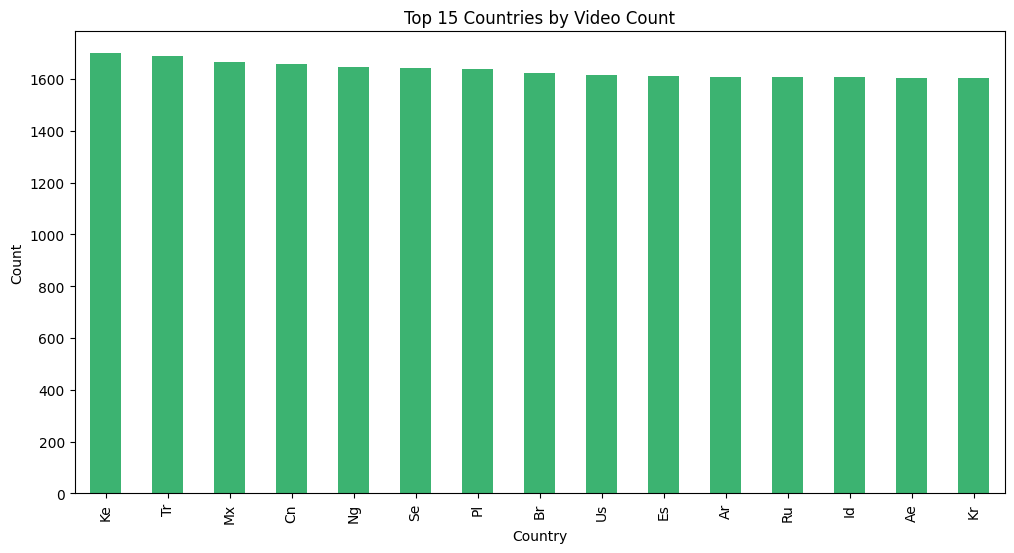

In [34]:
import matplotlib.pyplot as plt
# --------------------
# Total views by platform
# --------------------
plt.figure(figsize=(8,4))

if "platform" in df.columns:
    platform_views = df.groupby("platform")["views"].sum().sort_values()
elif "platform_TikTok" in df.columns and "platform_YouTube" in df.columns:
    platform_views = pd.Series({
        "TikTok": df.loc[df["platform_TikTok"] == 1, "views"].sum(),
        "YouTube": df.loc[df["platform_YouTube"] == 1, "views"].sum()
    }).sort_values()
else:
    platform_views = pd.Series(dtype=float)

platform_views.plot(kind="barh", color="skyblue")
plt.title("Total Views by Platform (Corrected)")
plt.xlabel("Views")
plt.show()


# --------------------
# Count of videos by platform
# --------------------
plt.figure(figsize=(6,4))
if "platform" in df.columns:
    df["platform"].value_counts().plot(kind="bar", color="lightcoral")
else:
    platform_counts = pd.Series({
        "TikTok": df["platform_TikTok"].sum() if "platform_TikTok" in df.columns else 0,
        "YouTube": df["platform_YouTube"].sum() if "platform_YouTube" in df.columns else 0
    })
    platform_counts.plot(kind="bar", color="lightcoral")

plt.title("Count of Videos by Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Videos")
plt.show()

# --------------------
# Distribution of top languages
# --------------------
plt.figure(figsize=(10,5))
if "language" in df.columns:
    df["language"].value_counts().head(10).plot(kind="bar", color="cornflowerblue")
else:
    # Si les langues sont encodées One-Hot
    language_cols = [c for c in df.columns if c.startswith("language_")]
    language_counts = df[language_cols].sum().sort_values(ascending=False).head(10)
    language_counts.plot(kind="bar", color="cornflowerblue")

plt.title("Top 10 Languages")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()

# --------------------
# Category distribution
# --------------------
plt.figure(figsize=(10,5))
if "category" in df.columns:
    df["category"].value_counts().head(10).plot(kind="bar", color="orchid")
else:
    category_cols = [c for c in df.columns if c.startswith("category_")]
    category_counts = df[category_cols].sum().sort_values(ascending=False).head(10)
    category_counts.plot(kind="bar", color="orchid")

plt.title("Top 10 Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# --------------------
# Country-level distribution
# --------------------
plt.figure(figsize=(12,6))
if "country" in df.columns:
    df["country"].value_counts().head(15).plot(kind="bar", color="mediumseagreen")
else:
    print("La colonne 'country' n'existe pas dans le DataFrame.")
plt.title("Top 15 Countries by Video Count")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


#Détectation des outliers

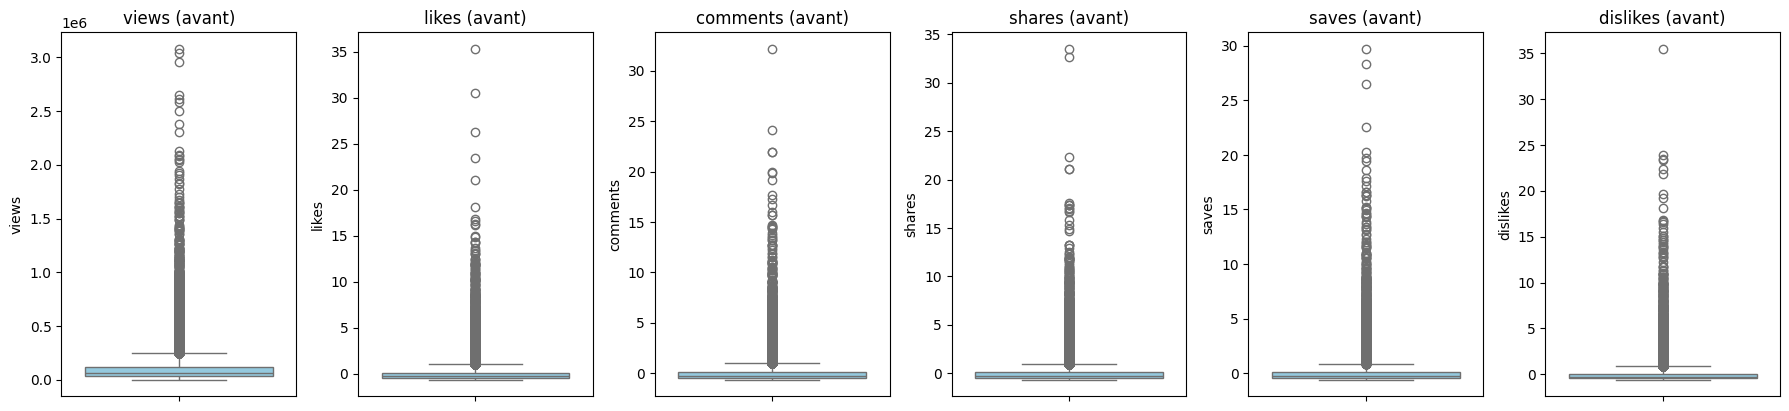

In [35]:
# Colonnes numériques à visualiser
num_cols = ["views", "likes", "comments", "shares", "saves", "dislikes"]

# Création d'un sous-dataframe pour avant capping
df_before = df[num_cols]

# Boxplots côte à côte
plt.figure(figsize=(18, 8))

for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols), i+1)
    sns.boxplot(y=df_before[col], color='skyblue')
    plt.title(f"{col} (avant)")

plt.tight_layout()
plt.show()


Statistiques descriptives avant traitement :


,views,likes,comments,shares,saves,dislikes
count,4.807900e+04,4.807900e+04,4.807900e+04,4.807900e+04,4.807900e+04,4.807900e+04
mean,9.929276e+04,-4.670054e-17,1.426140e-17,-3.081349e-17,-2.689714e-17,-1.123177e-17
std,1.318522e+05,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,7.940000e+02,-6.602826e-01,-6.464920e-01,-6.480654e-01,-6.021561e-01,-5.885003e-01
1%,5.901680e+03,-6.340090e-01,-6.237594e-01,-6.245202e-01,-5.827340e-01,-5.740923e-01
25%,3.032250e+04,-4.874784e-01,-4.842639e-01,-4.832485e-01,-4.631352e-01,-4.612289e-01
50%,5.962000e+04,-2.975442e-01,-2.993031e-01,-2.972408e-01,-2.965146e-01,-2.979372e-01
75%,1.180945e+05,1.018848e-01,9.438445e-02,9.596525e-02,6.994846e-02,6.466650e-02
99%,6.289908e+05,3.978707e+00,3.991519e+00,3.917740e+00,3.919313e+00,3.972189e+00
max,3.080686e+06,3.532224e+01,3.218457e+01,3.349376e+01,2.973404e+01,3.550137e+01


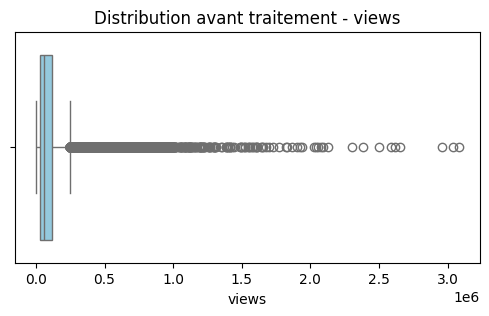

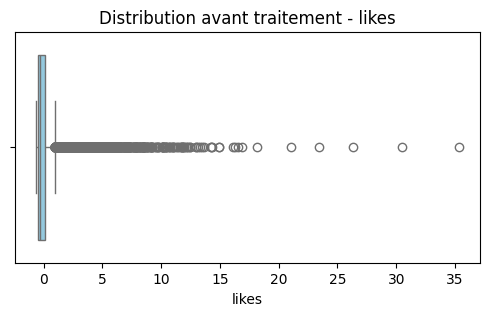

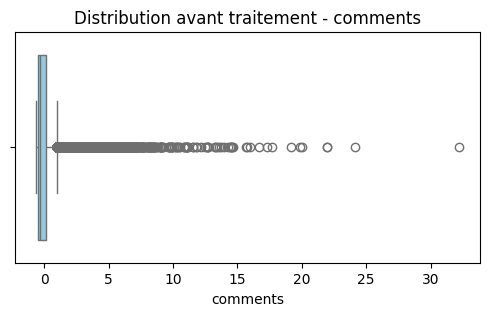

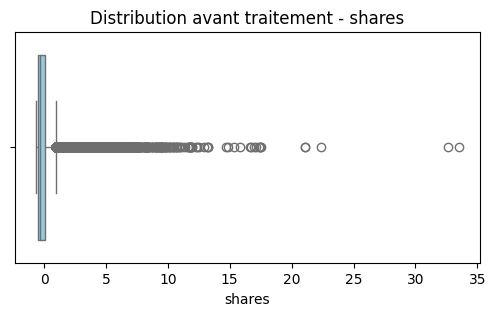

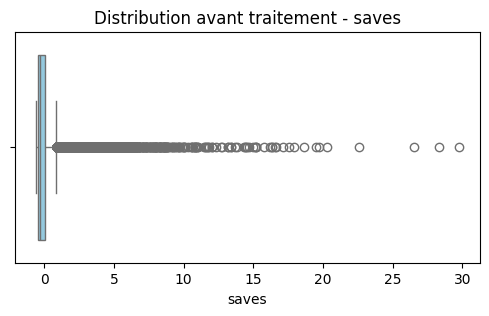

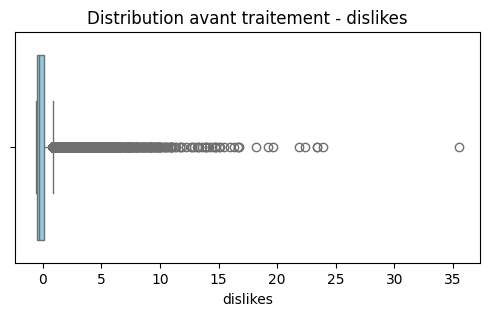

Clipping appliqué aux colonnes : ['likes', 'comments', 'shares', 'saves', 'dislikes']
Transformation logarithmique appliquée à 'views'

 Statistiques après traitement :


,views,likes,comments,shares,saves,dislikes,views_log
count,4.807900e+04,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000
mean,9.929276e+04,0.248189,0.247520,0.245586,0.237947,0.237682,11.001050
std,1.318522e+05,0.648839,0.655065,0.644307,0.642403,0.646898,1.001010
min,7.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,6.678342
1%,5.901680e+03,0.000000,0.000000,0.000000,0.000000,0.000000,8.683162
25%,3.032250e+04,0.000000,0.000000,0.000000,0.000000,0.000000,10.319678
50%,5.962000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,10.995763
75%,1.180945e+05,0.101885,0.094384,0.095965,0.069948,0.064666,11.679249
99%,6.289908e+05,3.975629,3.990278,3.916528,3.919138,3.971777,13.351873
max,3.080686e+06,3.978707,3.991519,3.917740,3.919313,3.972189,14.940663


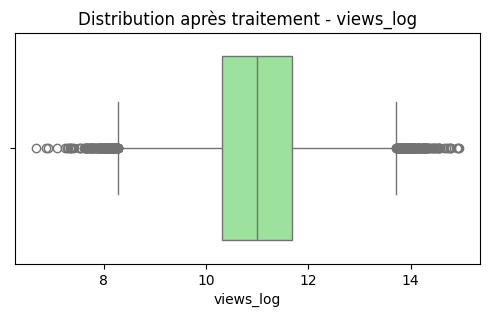

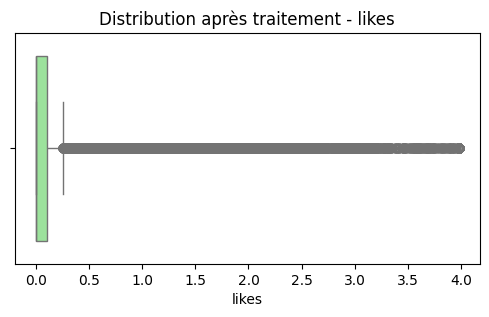

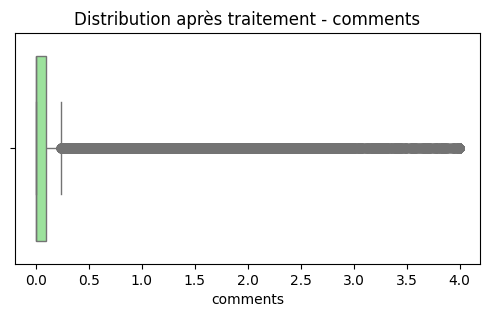

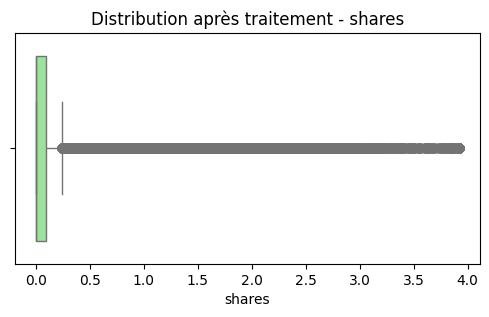

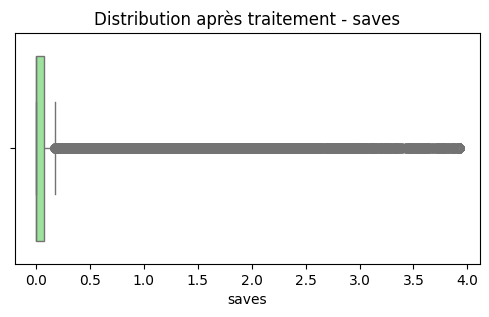

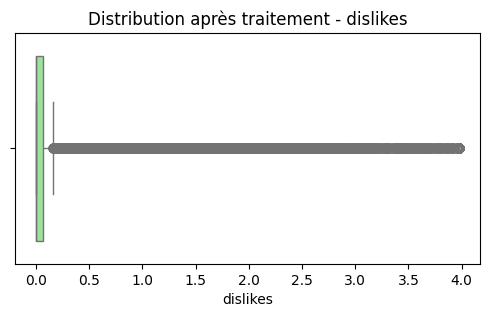

In [36]:
from sklearn.preprocessing import StandardScaler

# Colonnes numériques
num_cols = ["views", "likes", "comments", "shares", "saves", "dislikes"]

# Colonnes à traiter avec clipping (outliers souvent "erreurs" ou trop extrêmes)
normal_cols = ["likes", "comments", "shares", "saves", "dislikes"]

# Colonnes à conserver (car valeurs extrêmes légitimes)
viral_cols = ["views"]

# --------------------------
# Analyse descriptive initiale
# --------------------------
print("Statistiques descriptives avant traitement :")
display(df[num_cols].describe(percentiles=[.01, .25, .5, .75, .99]))

# --------------------------
# Visualisation rapide des distributions avant traitement
# --------------------------
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Distribution avant traitement - {col}")
    plt.show()

# --------------------------
# Traitement des colonnes "normal_cols" (clipping)
# --------------------------
for col in normal_cols:
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=0, upper=upper)
print("Clipping appliqué aux colonnes :", normal_cols)


# --------------------------
# Traitement spécial pour 'views' (valeurs extrêmes légitimes)
#     transformation logarithmique
# --------------------------
df["views_log"] = np.log1p(df["views"])  # log(views + 1)
print("Transformation logarithmique appliquée à 'views'")


# --------------------------
# Standardisation
# --------------------------
scaler = StandardScaler()
df[["likes_scaled", "comments_scaled", "shares_scaled", "saves_scaled", "dislikes_scaled"]] = scaler.fit_transform(
    df[["likes", "comments", "shares", "saves", "dislikes"]]
)

# --------------------------
#  Vérification après traitement
# --------------------------
print("\n Statistiques après traitement :")
display(df[num_cols + ["views_log"]].describe(percentiles=[.01, .25, .5, .75, .99]))

# --------------------------
#  Visualisation après traitement
# --------------------------
for col in ["views_log"] + normal_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Distribution après traitement - {col}")
    plt.show()



#Equilibrage de Dataset


*   Vérifier la distribution des classes



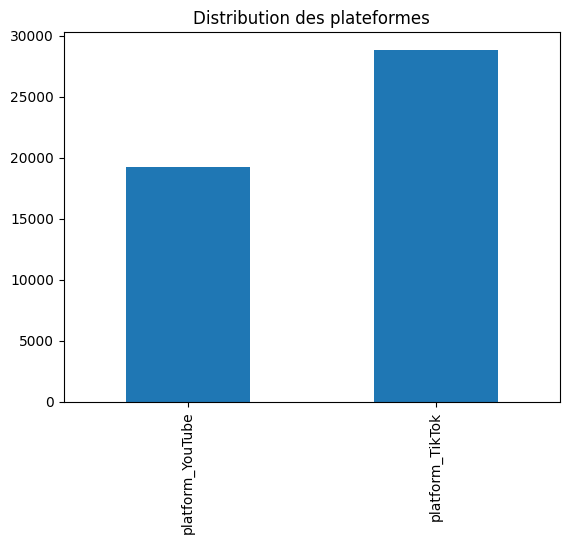

In [37]:
import matplotlib.pyplot as plt

df[['platform_YouTube', 'platform_TikTok']].sum().plot(kind='bar')
plt.title('Distribution des plateformes')
plt.show()


In [38]:
numeric_cols = ['views', 'likes_scaled', 'comments_scaled', 'engagement_rate', 'duration_sec']
print(df[numeric_cols].describe())


              views  likes_scaled  comments_scaled  engagement_rate  \
count  4.807900e+04  4.807900e+04     4.807900e+04     48079.000000   
mean   9.929276e+04  3.872006e-17     3.532097e-17         0.075415   
std    1.318522e+05  1.000010e+00     1.000010e+00         0.030091   
min    7.940000e+02 -3.825163e-01    -3.778603e-01         0.014720   
25%    3.032250e+04 -3.825163e-01    -3.778603e-01         0.052326   
50%    5.962000e+04 -3.825163e-01    -3.778603e-01         0.071575   
75%    1.180945e+05 -2.254883e-01    -2.337747e-01         0.094794   
max    3.080686e+06  5.749588e+00     5.715522e+00         0.235819   

       duration_sec  
count  48079.000000  
mean      34.489320  
std       16.401608  
min        5.000000  
25%       22.000000  
50%       31.000000  
75%       43.000000  
max       90.000000  



Balancing num_tags with target size = 2000
Balanced distribution for num_tags:
num_tags
3    2000
4    2000
5    2000
6    2000
Name: count, dtype: int64


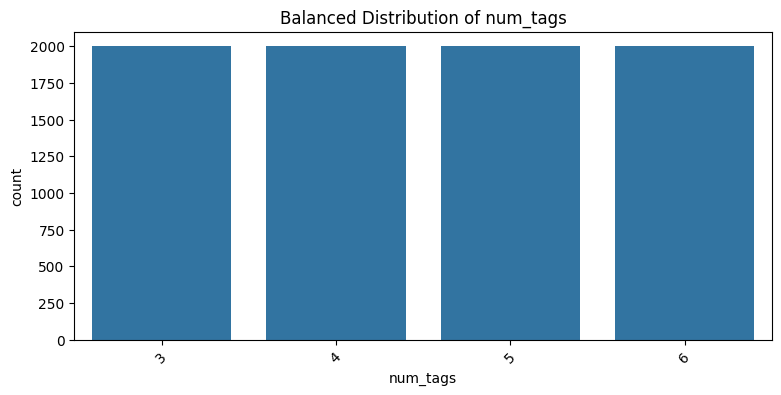


Balancing language_cat with target size = 2000
Balanced distribution for language_cat:
language_cat
en    2000
it    2000
tl    2000
nl    2000
fr    2000
ko    2000
pt    2000
de    2000
ja    2000
ru    2000
es    2000
id    2000
pl    2000
sw    2000
zh    2000
tr    2000
sv    2000
ar    2000
hi    2000
Name: count, dtype: int64


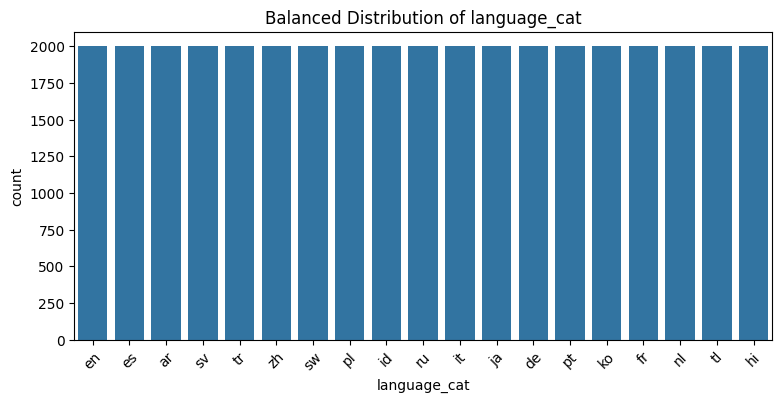


Balancing region_cat with target size = 5000
Balanced distribution for region_cat:
region_cat
Europe           5000
Asia             5000
Africa           5000
South America    5000
North America    5000
Oceania          5000
Name: count, dtype: int64


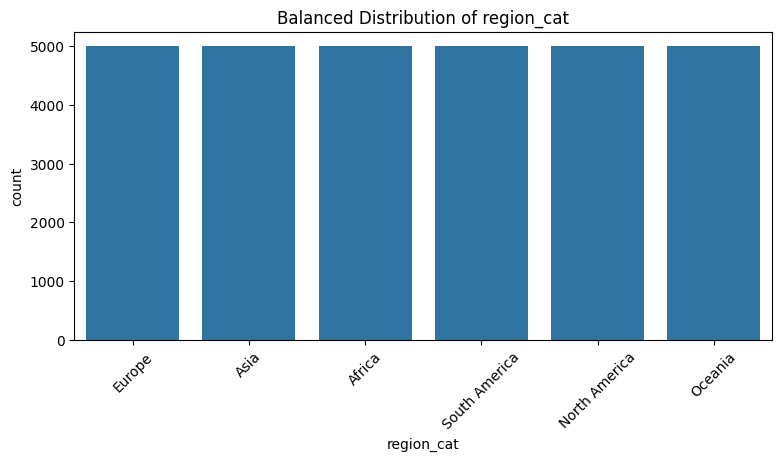


Balancing platform_cat with target size = 20000
Balanced distribution for platform_cat:
platform_cat
TikTok     20000
YouTube    20000
Name: count, dtype: int64


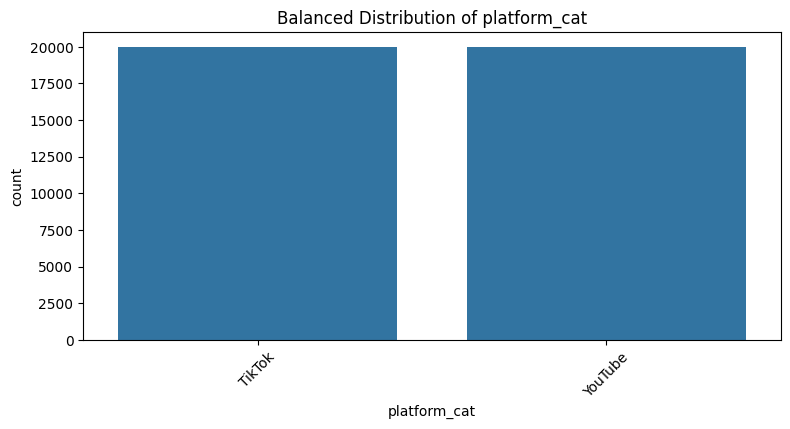

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copier le dataset
df_balanced = df.copy()

# ----------------------------

# Platform
platform_cols = [col for col in df_balanced.columns if col.startswith('platform_')]
df_balanced['platform_cat'] = df_balanced[platform_cols].idxmax(axis=1).str.replace('platform_', '')

# Region
region_cols = [col for col in df_balanced.columns if col.startswith('region_')]
df_balanced['region_cat'] = df_balanced[region_cols].idxmax(axis=1).str.replace('region_', '')

# Language
language_cols = [col for col in df_balanced.columns if col.startswith('language_')]
df_balanced['language_cat'] = df_balanced[language_cols].idxmax(axis=1).str.replace('language_', '')



# ----------------------------
# Colonnes à équilibrer
# ----------------------------
columns_to_balance = ['num_tags', 'language_cat', 'region_cat', 'platform_cat']

# ----------------------------
# Fonction de balancing
# ----------------------------
def balance_column(df, target_col, target_size=None):
    if target_col not in df.columns:
        print(f"Colonne {target_col} introuvable")
        return df

    y = df[target_col]
    class_counts = y.value_counts()

    if target_size is None:
        target_size = int(class_counts.median())

    print(f"\nBalancing {target_col} with target size = {target_size}")

    balanced_dfs = []
    for label in class_counts.index:
        class_df = df[df[target_col] == label]

        if len(class_df) > target_size:
            class_df = class_df.sample(target_size, random_state=42)
        else:
            oversample_count = target_size - len(class_df)
            oversampled = class_df.sample(oversample_count, replace=True, random_state=42)
            class_df = pd.concat([class_df, oversampled])

        balanced_dfs.append(class_df)

    df_balanced_target = pd.concat(balanced_dfs).reset_index(drop=True)

    # Visualisation
    print(f"Balanced distribution for {target_col}:")
    print(df_balanced_target[target_col].value_counts())
    plt.figure(figsize=(9,4))
    sns.countplot(x=target_col, data=df_balanced_target)
    plt.title(f'Balanced Distribution of {target_col}')
    plt.xticks(rotation=45)
    plt.show()

    return df_balanced_target

# ----------------------------
# Appliquer le balancing
# ----------------------------
target_sizes = {
    'num_tags': 2000,
    'language_cat': 2000,
    'region_cat': 5000,
    'platform_cat': 20000
}

for col in columns_to_balance:
    df_balanced = balance_column(df_balanced, col, target_sizes.get(col))

# ----------------------------
# Sauvegard du dataset équilibré
# ----------------------------
df_balanced.to_csv("balanced_youtube_shorts_tiktok_trends_2025.csv", index=False)

# ***BO5 : Segmentation des vidéos***

 ***KMEANS***

#### Préparation des données pour le clustering

In [40]:
# --- Import des librairies ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
# --- Chargement du dataset ---
df = pd.read_csv("youtube_shorts_tiktok_trends_2025_uncleaned.csv")
print("Dataset chargé :", df.shape)

# --- Sélection des variables pour le clustering ---
features = ['views', 'likes', 'comments', 'engagement_rate', 'duration_sec']

# Vérifier que toutes existent dans le dataset
features = [col for col in features if col in df.columns]
X = df[features].copy()

print(f"Variables utilisées pour le clustering : {features}")

# --- Normalisation ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Données normalisées prêtes pour le clustering :", X_scaled.shape)


Dataset chargé : (48079, 49)
Variables utilisées pour le clustering : ['views', 'likes', 'comments', 'engagement_rate', 'duration_sec']
Données normalisées prêtes pour le clustering : (48079, 5)


C:\Users\Oumar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Oumar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

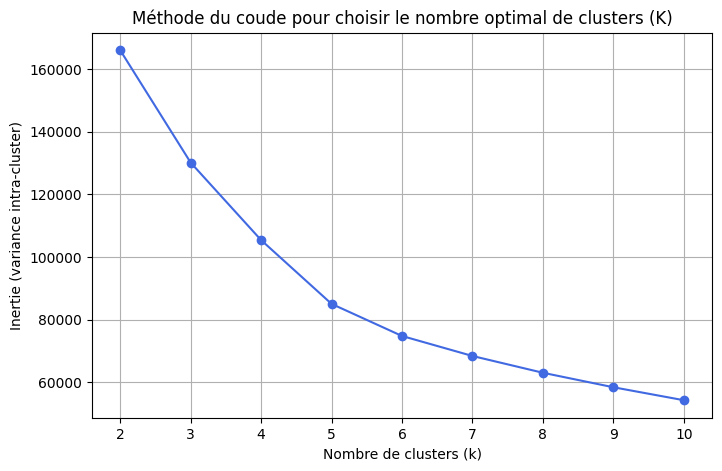

In [41]:
# --- Méthode du coude ---
inertia = []  # Somme des distances intra-cluster

for k in range(2, 11):  # On teste entre 2 et 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# --- Visualisation du coude ---
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o', color='royalblue')
plt.title("Méthode du coude pour choisir le nombre optimal de clusters (K)")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (variance intra-cluster)")
plt.grid(True)
plt.show()


#### Détermination du nombre optimal de clusters avec la méthode du coude

In [42]:
# --- KMeans ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)
df['cluster'] = labels

#### Application du K-Means avec K = 3

Moyennes par cluster :


,views,likes,comments,engagement_rate,duration_sec
cluster,,,,,
0,75874.51,3001.03,324.63,0.05,42.43
1,515458.75,33803.13,3777.84,0.09,32.48
2,82356.27,5828.32,635.57,0.10,26.23


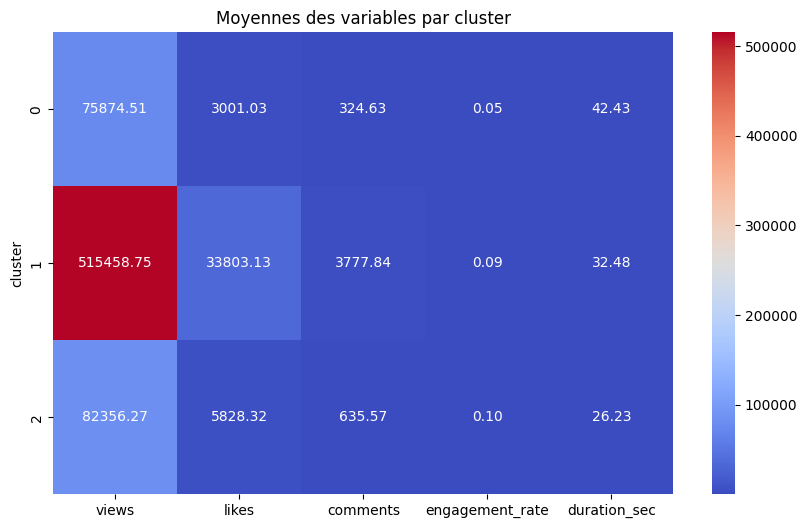

In [43]:
# --- Moyennes des variables par cluster ---
cluster_summary = df.groupby('cluster')[features].mean().round(2)
print("Moyennes par cluster :")
display(cluster_summary)

# --- Visualisation avec heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(
    cluster_summary,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'  # format avec 2 décimales
)
plt.title("Moyennes des variables par cluster")
plt.show()

####  Analyse des clusters – Moyennes des variables et heatmap

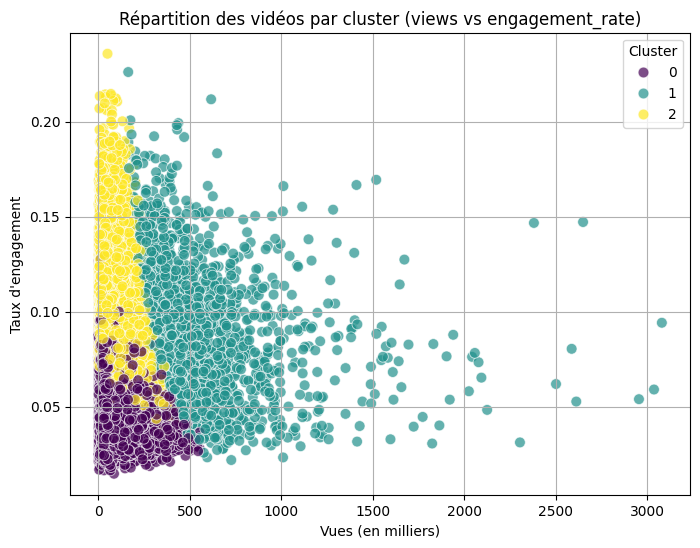

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Scatter plot final ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['views']/1000,  # vues en milliers
    y=df['engagement_rate'],
    hue=df['cluster'],
    palette='viridis',
    alpha=0.7,  # points légèrement transparents
    s=60       # taille des points
)

plt.title("Répartition des vidéos par cluster (views vs engagement_rate)")
plt.xlabel("Vues (en milliers)")
plt.ylabel("Taux d'engagement")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


***DBSCAN***

In [45]:
# --- Import des librairies ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

# --- Sélection des variables pour le clustering ---
features = ['views', 'likes', 'comments', 'engagement_rate', 'duration_sec']

# Vérifier que toutes les colonnes existent
features = [col for col in features if col in df_balanced.columns]
X = df_balanced[features].copy()

# --- Normalisation ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(" Données normalisées prêtes pour DBSCAN :", X_scaled.shape)


 Données normalisées prêtes pour DBSCAN : (40000, 5)


####  Visualisation des clusters – Scatter plot (views vs engagement_rate)

In [46]:
# --- Réduction à 2 composantes pour visualisation ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"Variance totale expliquée par PCA : {pca.explained_variance_ratio_.sum():.2f}")


Variance totale expliquée par PCA : 0.79


#### Réduction de dimension avec PCA pour visualisation

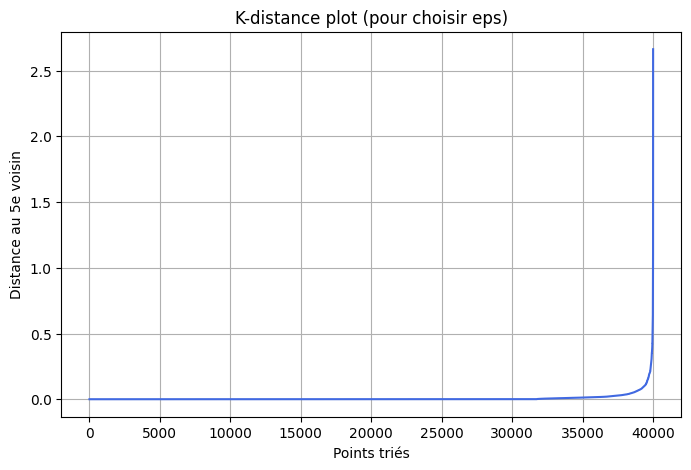

In [47]:
# --- K-distance plot pour déterminer eps ---
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_pca)
distances, indices = nbrs.kneighbors(X_pca)

# Distance au 5e voisin pour chaque point
distances = np.sort(distances[:, 4])

plt.figure(figsize=(8,5))
plt.plot(distances, color='royalblue')
plt.title("K-distance plot (pour choisir eps)")
plt.xlabel("Points triés")
plt.ylabel("Distance au 5e voisin")
plt.grid(True)
plt.show()

best_eps = 0.5


#### Détermination du paramètre eps pour DBSCAN avec le K-distance plot

In [48]:
# --- Application de DBSCAN ---
db = DBSCAN(eps=best_eps, min_samples=10)
df_balanced['dbscan_cluster'] = db.fit_predict(X_pca)

# --- Analyse des clusters ---
n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise = list(db.labels_).count(-1)

print(f"Nombre de clusters trouvés : {n_clusters}")
print(f"Nombre de points considérés comme bruit : {n_noise}")


Nombre de clusters trouvés : 10
Nombre de points considérés comme bruit : 74


#### Application de DBSCAN et analyse des clusters

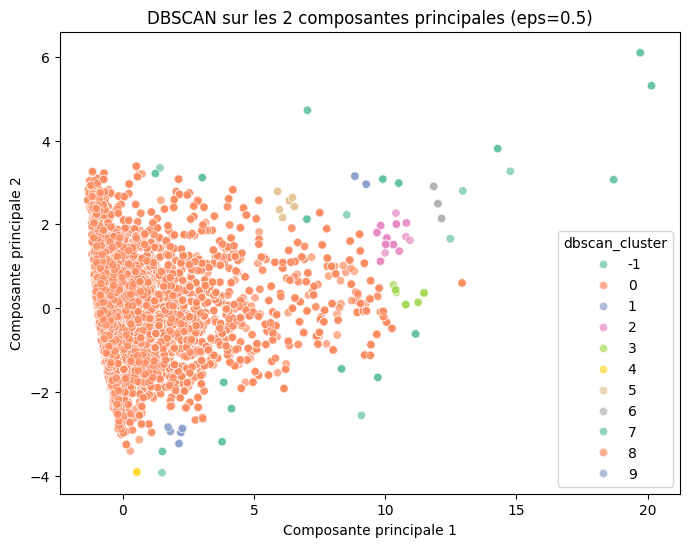

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df_balanced['dbscan_cluster'],
    palette='Set2',
    legend='full',
    alpha=0.7
)
plt.title(f"DBSCAN sur les 2 composantes principales (eps={best_eps})")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()


#### Visualisation des clusters DBSCAN sur les 2 composantes principales

***Spectral***

Dataset chargé : (48079, 49)
Moyennes par cluster (Spectral Clustering) :


,views,likes,comments,engagement_rate,duration_sec
cluster_spectral,,,,,
0,55565.87,2262.78,244.63,0.06,28.28
1,143257.70,9453.51,1039.50,0.10,30.02
2,70409.23,2807.51,304.26,0.05,61.04


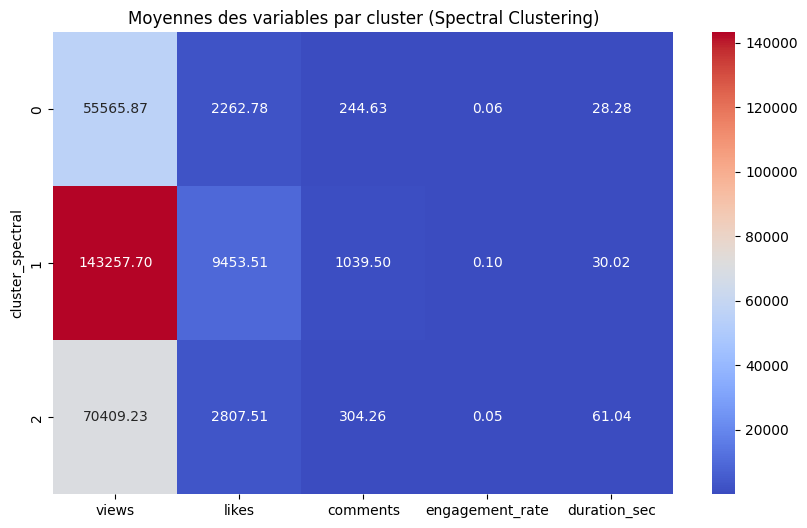

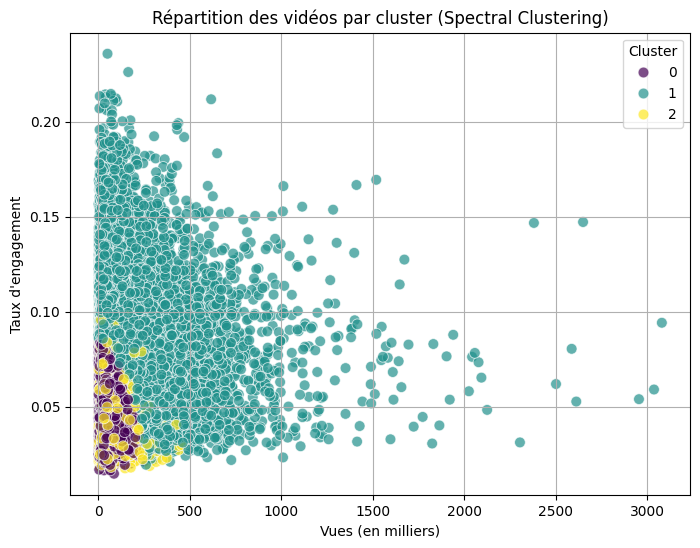

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import seaborn as sns

# --- Chargement du dataset ---
df = pd.read_csv("youtube_shorts_tiktok_trends_2025_uncleaned.csv")
print("Dataset chargé :", df.shape)

# --- Sélection des features pertinentes ---
features = ['views', 'likes', 'comments', 'engagement_rate', 'duration_sec']
features = [col for col in features if col in df.columns]  # vérifie que les colonnes existent
X = df[features].copy()

# --- Normalisation ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Spectral Clustering ---
n_clusters = 3  # nombre de clusters comme KMeans
spectral = SpectralClustering(
    n_clusters=n_clusters,
    affinity='nearest_neighbors',  # peut aussi être 'rbf'
    random_state=42
)
labels_spectral = spectral.fit_predict(X_scaled)
df['cluster_spectral'] = labels_spectral

# --- Moyennes par cluster ---
cluster_summary = df.groupby('cluster_spectral')[features].mean().round(2)
print("Moyennes par cluster (Spectral Clustering) :")
display(cluster_summary)

# --- Heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(
    cluster_summary,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title("Moyennes des variables par cluster (Spectral Clustering)")
plt.show()

# --- Scatter plot (views vs engagement_rate) ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['views']/1000,  # vues en milliers
    y=df['engagement_rate'],
    hue=df['cluster_spectral'],
    palette='viridis',
    alpha=0.7,
    s=60
)
plt.title("Répartition des vidéos par cluster (Spectral Clustering)")
plt.xlabel("Vues (en milliers)")
plt.ylabel("Taux d'engagement")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


***Agglomerative***

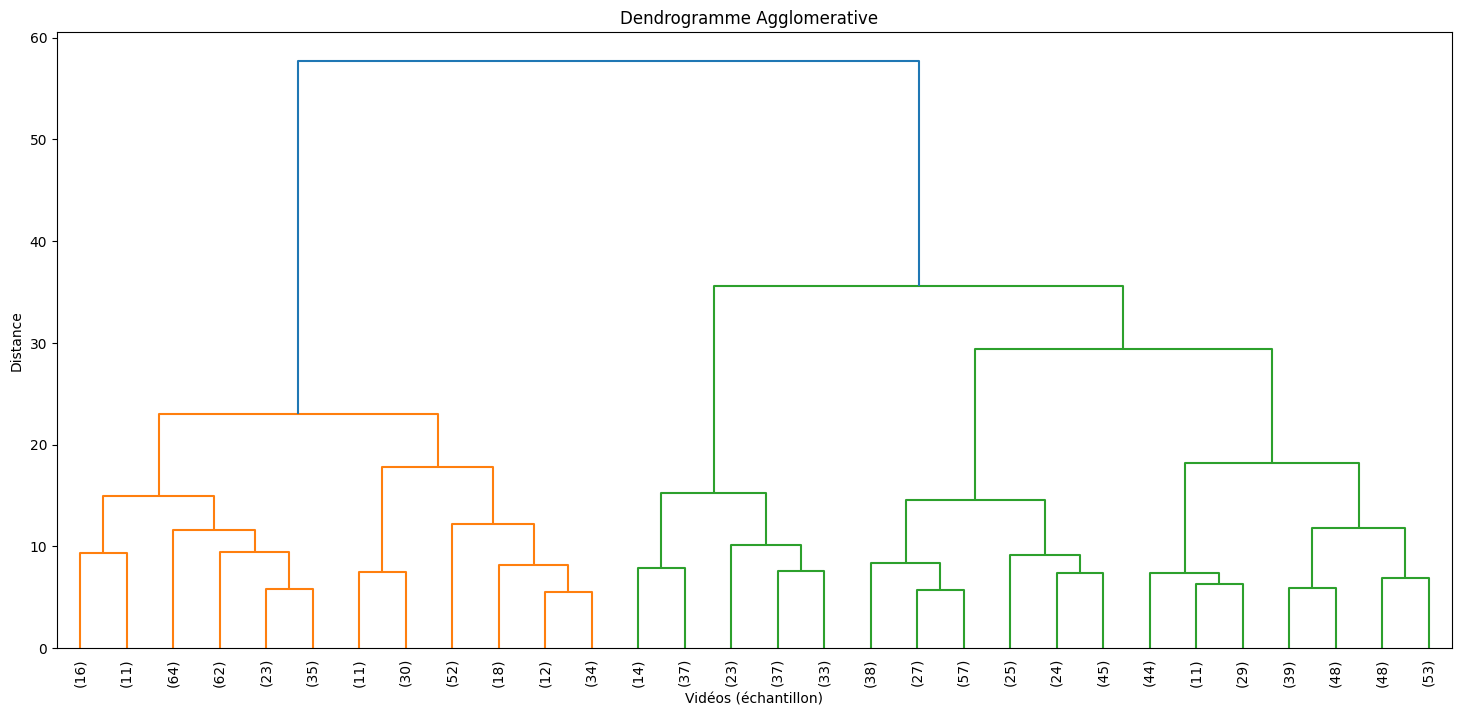

In [51]:
# ========================
# Agglomerative - Dendrogramme amélioré
# ========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

# --- Échantillon pour dendrogramme ---
sample_size = 1000  # tu peux ajuster selon ta mémoire
df_sample = df.sample(sample_size, random_state=42)

# --- Sélection des features et log-transform pour dispersion ---
features = ['views', 'likes', 'comments', 'engagement_rate', 'duration_sec']
features = [col for col in features if col in df.columns]

for col in ['views','likes','comments']:
    if col in features:
        df_sample[col + '_log'] = np.log1p(df_sample[col])

features_scaled = [f + '_log' for f in ['views','likes','comments']] + ['engagement_rate','duration_sec']

# --- Normalisation ---
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(df_sample[features_scaled])

# --- Linkage ---
linked = linkage(X_sample_scaled, method='ward')

# --- Dendrogramme amélioré ---
plt.figure(figsize=(18,8))  # plus large et plus haut
dendrogram(
    linked,
    truncate_mode='lastp',  # n'affiche que les p dernières fusions
    p=30,                   # nombre de clusters visibles
    show_leaf_counts=True,
    leaf_rotation=90.,      # rotation des étiquettes pour mieux lire
    leaf_font_size=10.,
    color_threshold=0.7*max(linked[:,2])  # colorie les clusters principaux
)
plt.title("Dendrogramme Agglomerative  ")
plt.xlabel("Vidéos (échantillon)")
plt.ylabel("Distance")
plt.show()


# ***BO4 : Segmentation des créateurs***

***Kmeans***

 Données agrégées par créateur : (720, 11)


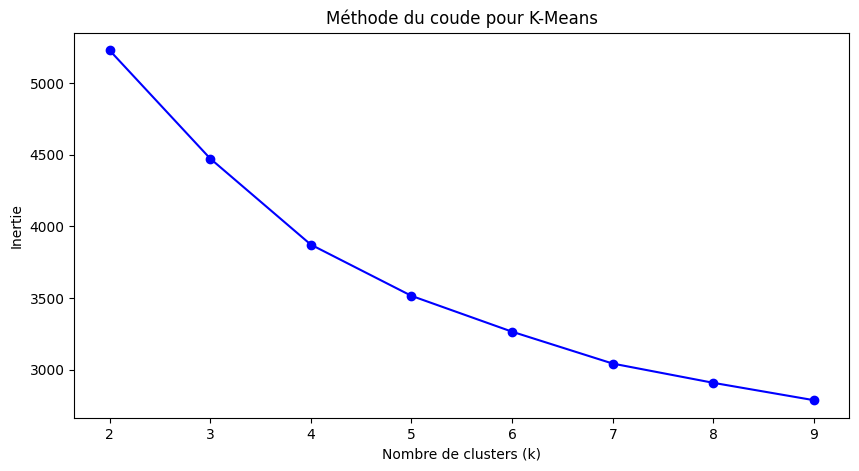

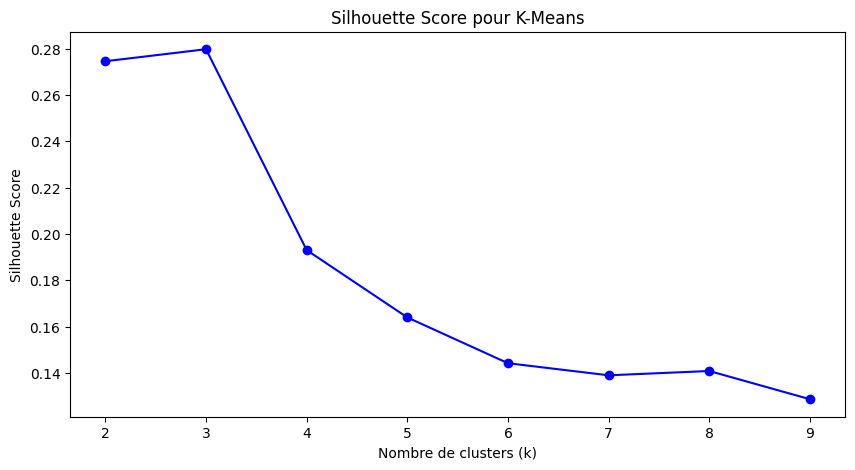


Distribution des creator_tier par cluster :
 creator_tier  Micro    Mid
cluster                   
0               0.0   77.0
1               0.0  316.0
2               0.0  326.0
3               1.0    0.0


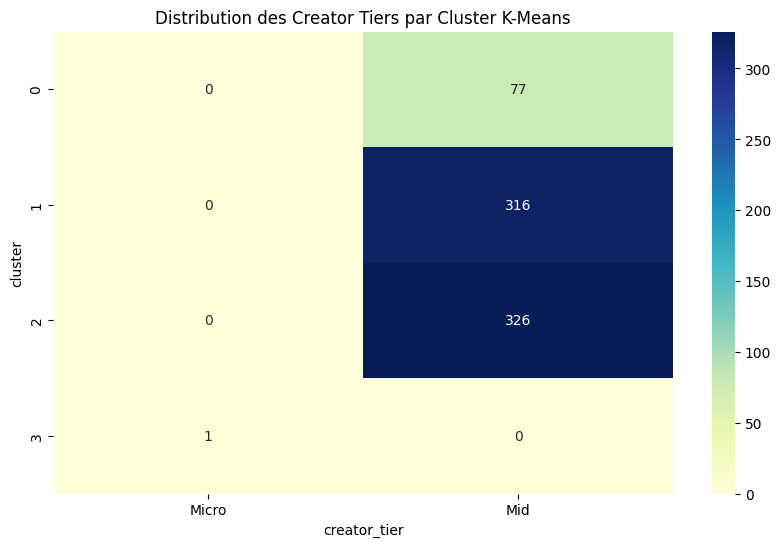


Stats moyennes par cluster :
                  views        likes    comments      shares       saves  \
cluster                                                                   
0        134343.241053  8124.972812  876.227625  789.646272  856.745179   
1         85063.077543  4758.803041  520.567754  459.199625  487.378102   
2        104774.738844  6148.322289  677.218039  593.376873  636.042794   
3         44793.606061  2205.121212  237.757576  211.484848  265.787879   

         engagement_rate  duration_sec  title_length  has_emoji  
cluster                                                          
0               0.076530     34.861863     22.907206   0.468876  
1               0.074158     34.845182     22.841930   0.463255  
2               0.076399     34.153685     22.937786   0.457891  
3               0.069420     33.484848     24.636364   0.484848  


In [52]:
# --- Agrégation des données par créateur ---
# Calcul des métriques moyennes par author_handle et creator_tier
from sklearn.metrics import silhouette_score
creator_agg = df.groupby(['author_handle', 'creator_tier']).agg({
    'views': 'mean',
    'likes': 'mean',
    'comments': 'mean',
    'shares': 'mean',
    'saves': 'mean',
    'engagement_rate': 'mean',
    'duration_sec': 'mean',
    'title_length': 'mean',
    'has_emoji': 'mean'  # Proportion d'emojis
}).reset_index()

print(" Données agrégées par créateur :", creator_agg.shape)
creator_agg.head()

# --- Encodage de creator_tier (catégorielle) ---
le = LabelEncoder()
creator_agg['creator_tier_encoded'] = le.fit_transform(creator_agg['creator_tier'])

# --- Sélection des features pour clustering ---
cluster_features = [
    'views', 'likes', 'comments', 'shares', 'saves',
    'engagement_rate', 'duration_sec', 'title_length',
    'has_emoji', 'creator_tier_encoded'  # Inclure le tier encodé pour influencer
]
X_cluster = creator_agg[cluster_features]

# Normalisation
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# --- Détermination du nombre optimal de clusters (méthode du coude) ---
inertias = []
sil_scores = []
k_range = range(2, 10)  # Tester de 2 à 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_cluster_scaled, kmeans.labels_))

# Visualisation du coude
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour K-Means')
plt.show()

# Visualisation du silhouette score (plus élevé = meilleur)
plt.figure(figsize=(10, 5))
plt.plot(k_range, sil_scores, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score pour K-Means')
plt.show()

# --- Choix du k optimal (ex. : basé sur le coude, disons k=4 – ajustez selon vos graphs) ---
optimal_k = 4  # Remplacez par la valeur optimale observée
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
creator_agg['cluster'] = kmeans.fit_predict(X_cluster_scaled)

# --- Analyse des clusters par creator_tier ---
cluster_tier_dist = creator_agg.groupby(['cluster', 'creator_tier']).size().unstack().fillna(0)
print("\nDistribution des creator_tier par cluster :\n", cluster_tier_dist)

# Visualisation (heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_tier_dist, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Distribution des Creator Tiers par Cluster K-Means')
plt.show()

# --- Stats descriptives par cluster ---
cluster_stats = creator_agg.groupby('cluster')[cluster_features[:-1]].mean()  # Sans le tier encodé
print("\nStats moyennes par cluster :\n", cluster_stats)

In [53]:
tier_mapping = {0: 'Star', 1: 'Macro', 2: 'Mid', 3: 'Micro'}
creator_agg['predicted_tier'] = creator_agg['cluster'].map(tier_mapping)

# Vérification immédiate
print("Colonnes dans creator_agg :", creator_agg.columns.tolist())
print("\nRépartition des tiers prédits :")
print(creator_agg['predicted_tier'].value_counts().sort_index())

# Affichage rapide pour confirmer
creator_agg[['author_handle', 'creator_tier', 'cluster', 'predicted_tier']].head(10)

Colonnes dans creator_agg : ['author_handle', 'creator_tier', 'views', 'likes', 'comments', 'shares', 'saves', 'engagement_rate', 'duration_sec', 'title_length', 'has_emoji', 'creator_tier_encoded', 'cluster', 'predicted_tier']

Répartition des tiers prédits :
predicted_tier
Macro    316
Micro      1
Mid      326
Star      77
Name: count, dtype: int64


,author_handle,creator_tier,cluster,predicted_tier
0,Ahmed,Mid,2,Mid
1,AhmedChannel,Mid,2,Mid
2,AhmedOfficial,Mid,2,Mid
3,AhmedPro,Mid,2,Mid
4,AhmedShorts,Mid,2,Mid
5,AhmedTV,Mid,1,Macro
6,AhmedVlogs,Mid,1,Macro
7,AhmedYT,Mid,1,Macro
8,Ali,Mid,2,Mid
9,AliChannel,Mid,2,Mid


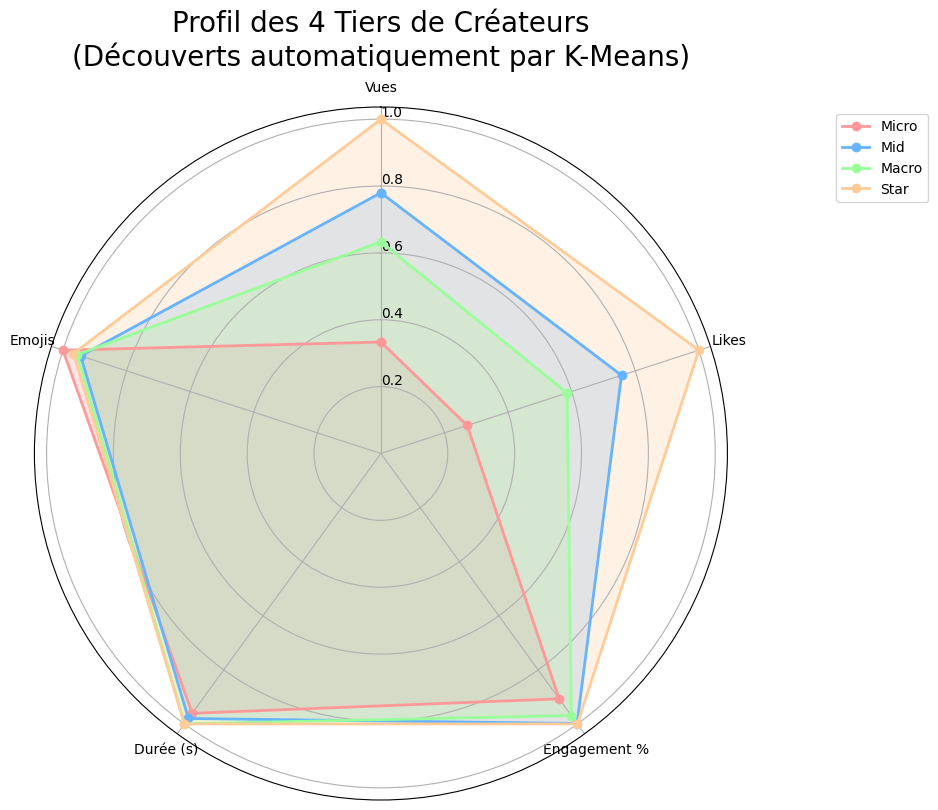

In [54]:
from math import pi
import matplotlib.pyplot as plt

# Moyennes par cluster
stats = creator_agg.groupby('predicted_tier')[['views', 'likes', 'engagement_rate', 'duration_sec', 'has_emoji']].mean()
stats = stats.reindex(['Micro', 'Mid', 'Macro', 'Star'])  # Ordre croissant

# Normalisation pour radar (0-100)
stats_norm = stats / stats.max()

# Radar chart
categories = ['Vues', 'Likes', 'Engagement %', 'Durée (s)', 'Emojis']
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
tiers = stats_norm.index

for i, tier in enumerate(tiers):
    values = stats_norm.loc[tier].tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=tier, color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), categories)
ax.set_rlabel_position(0)
ax.grid(True)
ax.set_title("Profil des 4 Tiers de Créateurs\n(Découverts automatiquement par K-Means)", size=20, pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()

In [55]:
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_cluster_scaled)

creator_agg['pca1'] = X_pca[:,0]
creator_agg['pca2'] = X_pca[:,1]
creator_agg['pca3'] = X_pca[:,2]

fig = px.scatter_3d(creator_agg, x='pca1', y='pca2', z='pca3',
                    color='predicted_tier', size='views',
                    hover_data=['author_handle', 'creator_tier'],
                    title='Créateurs dans l’espace 3D (PCA) - 4 clusters parfaits')
fig.update_layout(height=800)
fig.show()

***Agglomerative***

Agglomerative Silhouette Score: 0.12347065427959482
Agglomerative Adjusted Rand Index: 0.002864206688848725

Distribution des creator_tier par cluster (Agglomerative):
 creator_tier  Micro    Mid
cluster_agg               
0               0.0  200.0
1               0.0  228.0
2               1.0    0.0
3               0.0  291.0


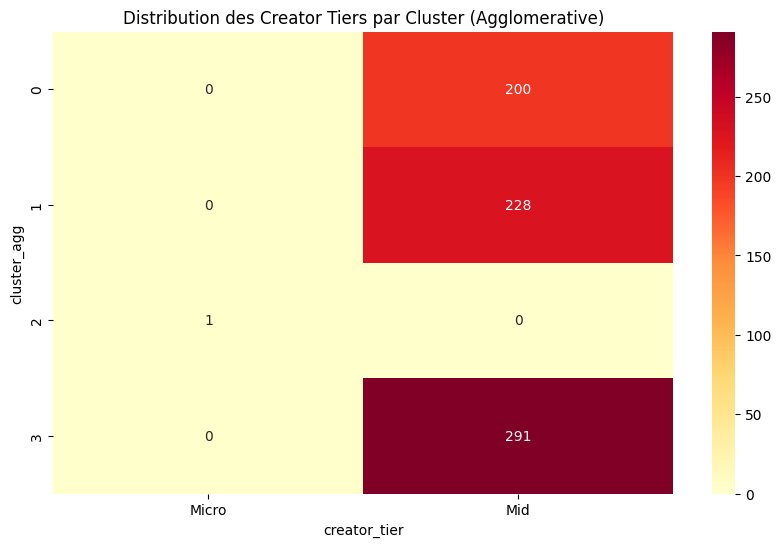

In [56]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Try with 4 clusters (same as your K-Means baseline)
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
creator_agg['cluster_agg'] = agg.fit_predict(X_cluster_scaled)

# Evaluate
sil_score = silhouette_score(X_cluster_scaled, creator_agg['cluster_agg'])
ari_score = adjusted_rand_score(creator_agg['creator_tier_encoded'], creator_agg['cluster_agg'])

print("Agglomerative Silhouette Score:", sil_score)
print("Agglomerative Adjusted Rand Index:", ari_score)

# Distribution by creator_tier
cluster_tier_dist_agg = creator_agg.groupby(['cluster_agg', 'creator_tier']).size().unstack().fillna(0)
print("\nDistribution des creator_tier par cluster (Agglomerative):\n", cluster_tier_dist_agg)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_tier_dist_agg, annot=True, cmap='YlOrRd', fmt='g')
plt.title('Distribution des Creator Tiers par Cluster (Agglomerative)')
plt.show()


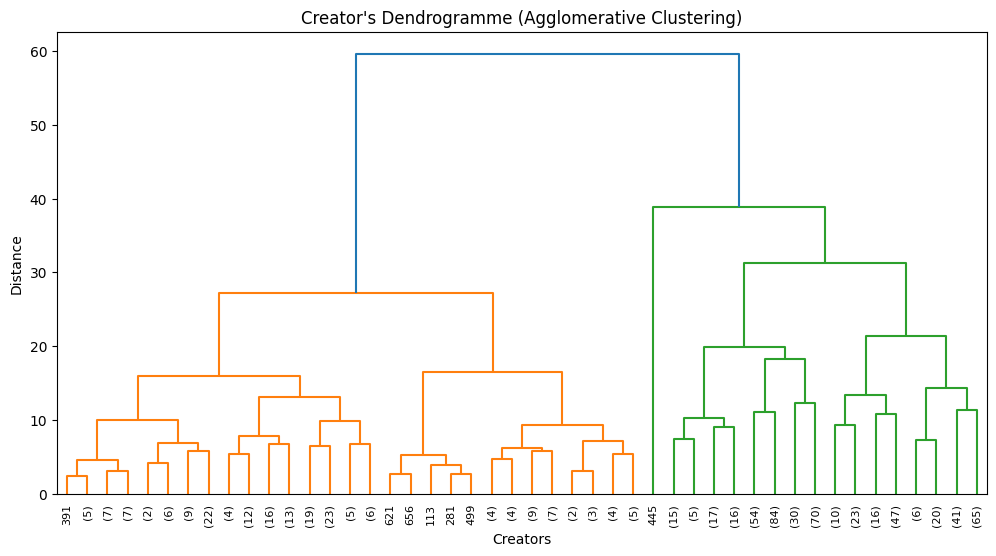

In [57]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute linkage matrix
Z = linkage(X_cluster_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)  # show top 5 levels
plt.title("Creator's Dendrogramme (Agglomerative Clustering)")
plt.xlabel("Creators")
plt.ylabel("Distance")
plt.show()

***GMM***

GMM Silhouette Score: 0.21105362316388512
GMM Adjusted Rand Index: 0.004809956501763085

Distribution des creator_tier par cluster (GMM):
 creator_tier  Micro    Mid
cluster_gmm               
0               0.0  231.0
1               1.0    3.0
2               0.0   54.0
3               0.0  431.0


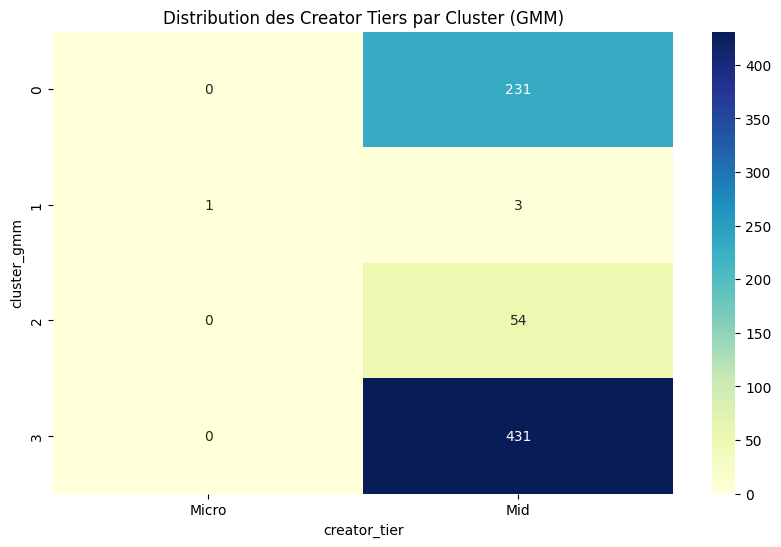

In [58]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Fit GMM with 4 components (same as K-Means baseline)
gmm = GaussianMixture(n_components=4, random_state=42)
creator_agg['cluster_gmm'] = gmm.fit_predict(X_pca)

# Evaluate
sil_score = silhouette_score(X_pca, creator_agg['cluster_gmm'])
ari_score = adjusted_rand_score(creator_agg['creator_tier_encoded'], creator_agg['cluster_gmm'])

print("GMM Silhouette Score:", sil_score)
print("GMM Adjusted Rand Index:", ari_score)

# Distribution by creator_tier
cluster_tier_dist_gmm = creator_agg.groupby(['cluster_gmm', 'creator_tier']).size().unstack().fillna(0)
print("\nDistribution des creator_tier par cluster (GMM):\n", cluster_tier_dist_gmm)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_tier_dist_gmm, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Distribution des Creator Tiers par Cluster (GMM)')
plt.show()


In [59]:
import plotly.express as px

fig = px.scatter_3d(
    creator_agg, x=X_pca[:,0], y=X_pca[:,1], z=X_pca[:,2],
    color=creator_agg['cluster_gmm'].astype(str),
    size='views',
    hover_data=['author_handle', 'creator_tier'],
    title='Créateurs dans l’espace PCA (GMM Clustering)'
)
fig.update_layout(height=800)
fig.show()

***DBSCAN***

In [60]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score

eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [3, 5, 10]

results_dbscan = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_cluster_scaled)

        # Nombre de clusters (hors bruit)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        # Silhouette score (uniquement si au moins 2 clusters valides)
        if n_clusters > 1:
            sil = silhouette_score(X_cluster_scaled, labels)
        else:
            sil = None

        ari = adjusted_rand_score(creator_agg['creator_tier_encoded'], labels)

        results_dbscan.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'silhouette': sil,
            'ARI': ari
        })

# Affichage des résultats
import pandas as pd
results_df = pd.DataFrame(results_dbscan)
print(results_df.sort_values(by='silhouette', ascending=False))


    eps  min_samples  n_clusters  n_noise  silhouette       ARI
6   1.5            3           3      144    0.002910  0.007674
4   1.0            5           2      478   -0.123397 -0.001405
3   1.0            3          12      401   -0.294727 -0.000983
0   0.5            3           0      720         NaN  0.000000
1   0.5            5           0      720         NaN  0.000000
2   0.5           10           0      720         NaN  0.000000
5   1.0           10           1      555         NaN -0.001947
7   1.5            5           1      163         NaN  0.006699
8   1.5           10           1      200         NaN  0.004438
9   2.0            3           1       33         NaN  0.053647
10  2.0            5           1       39         NaN  0.044763
11  2.0           10           1       49         NaN  0.034695


DBSCAN Silhouette Score: Non défini (clusters trop faibles ou outliers seulement)
DBSCAN Adjusted Rand Index: 0.007674281765651355

Distribution des creator_tier par cluster (DBSCAN):
 creator_tier    Micro    Mid
cluster_dbscan              
-1                1.0  143.0
 0                0.0  569.0
 1                0.0    3.0
 2                0.0    4.0


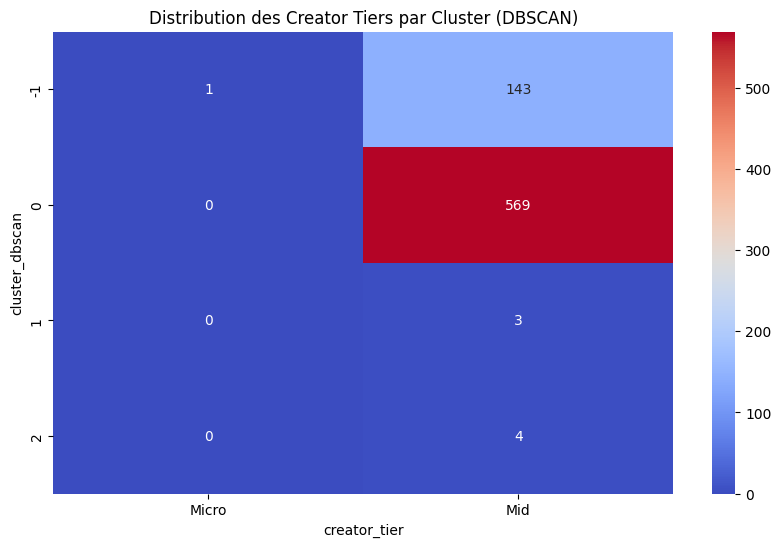

In [61]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score

# DBSCAN avec paramètres de base (à tuner)
dbscan = DBSCAN(eps=1.5, min_samples=3)
creator_agg['cluster_dbscan'] = dbscan.fit_predict(X_cluster_scaled)

# Scores (attention : DBSCAN peut donner -1 pour les outliers)
labels_dbscan = creator_agg['cluster_dbscan']
# Filtrer si au moins 2 clusters valides
if len(set(labels_dbscan)) > 1 and -1 not in set(labels_dbscan):
    sil_score = silhouette_score(X_cluster_scaled, labels_dbscan)
else:
    sil_score = "Non défini (clusters trop faibles ou outliers seulement)"

ari_score = adjusted_rand_score(creator_agg['creator_tier_encoded'], labels_dbscan)

print("DBSCAN Silhouette Score:", sil_score)
print("DBSCAN Adjusted Rand Index:", ari_score)

# Distribution par tier
cluster_tier_dist_dbscan = creator_agg.groupby(['cluster_dbscan', 'creator_tier']).size().unstack().fillna(0)
print("\nDistribution des creator_tier par cluster (DBSCAN):\n", cluster_tier_dist_dbscan)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_tier_dist_dbscan, annot=True, cmap='coolwarm', fmt='g')
plt.title('Distribution des Creator Tiers par Cluster (DBSCAN)')
plt.show()


In [62]:
fig = px.scatter_3d(
    creator_agg, x='pca1', y='pca2', z='pca3',
    color=creator_agg['cluster_dbscan'].astype(str),
    size='views',
    hover_data=['author_handle', 'creator_tier'],
    title='Créateurs dans l’espace PCA (DBSCAN Clustering)'
)
fig.update_layout(height=800)
fig.show()


***Spectral***

Spectral Clustering Silhouette Score: 0.1639686087414769
Spectral Clustering Adjusted Rand Index: 0.000789461829943311

Distribution des creator_tier par cluster (Spectral):
 creator_tier      Micro    Mid
cluster_spectral              
0                   0.0  204.0
1                   0.0  297.0
2                   0.0   73.0
3                   1.0  145.0


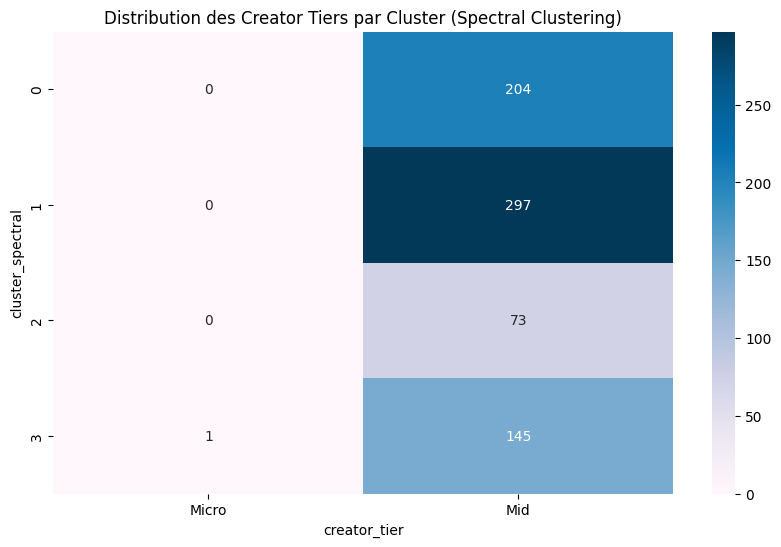

In [63]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Spectral Clustering avec 4 clusters (comme baseline)
spectral = SpectralClustering(n_clusters=4, random_state=42, affinity='nearest_neighbors')
creator_agg['cluster_spectral'] = spectral.fit_predict(X_cluster_scaled)

# Scores
sil_score = silhouette_score(X_cluster_scaled, creator_agg['cluster_spectral'])
ari_score = adjusted_rand_score(creator_agg['creator_tier_encoded'], creator_agg['cluster_spectral'])

print("Spectral Clustering Silhouette Score:", sil_score)
print("Spectral Clustering Adjusted Rand Index:", ari_score)

# Distribution par tier
cluster_tier_dist_spectral = creator_agg.groupby(['cluster_spectral', 'creator_tier']).size().unstack().fillna(0)
print("\nDistribution des creator_tier par cluster (Spectral):\n", cluster_tier_dist_spectral)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_tier_dist_spectral, annot=True, cmap='PuBu', fmt='g')
plt.title('Distribution des Creator Tiers par Cluster (Spectral Clustering)')
plt.show()


In [64]:
fig = px.scatter_3d(
    creator_agg, x='pca1', y='pca2', z='pca3',
    color=creator_agg['cluster_spectral'].astype(str),
    size='views',
    hover_data=['author_handle', 'creator_tier'],
    title='Créateurs dans l’espace PCA (Spectral Clustering)'
)
fig.update_layout(height=800)
fig.show()

# ***BO3 : Prédiction du timing***

***Gradient Boosting***

On a créé des features temporelles enrichies pour capturer heures, jour, weekend, interactions et patterns cycliques

In [65]:

# -- Importation --

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")


# dataset clean + balanced

df = pd.read_csv("balanced_youtube_shorts_tiktok_trends_2025.csv")


# Cible binaire -- target y

engagement_median = df['engagement_rate'].median()
df['performance'] = np.where(df['engagement_rate'] > engagement_median, 1, 0)


# Supprimer missing

temporal_features = ['upload_hour','publish_dayofweek','is_weekend','publish_period','season','event_season']
df = df.dropna(subset=temporal_features)


# Mapping jours pour features cycliques

day2num = {'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}


# Features temporelles enrichies (on a utilisé des noms sigificatifs )

df['Hour'] = df['upload_hour']
df['Hour_squared'] = df['upload_hour'] ** 2
df['Weekend'] = df['is_weekend']
df['Hour_x_Weekend'] = df['upload_hour'] * df['is_weekend']
df['Hour_sin'] = np.sin(2*np.pi*df['upload_hour']/24)
df['Hour_cos'] = np.cos(2*np.pi*df['upload_hour']/24)
df['Day_sin'] = df['publish_dayofweek'].map(day2num).apply(lambda x: np.sin(2*np.pi*x/7))
df['Day_cos'] = df['publish_dayofweek'].map(day2num).apply(lambda x: np.cos(2*np.pi*x/7))
df['TimeSlot'] = df['publish_period'] + "_" + df['publish_dayofweek']

# Colonnes
numerical_cols = ['Hour', 'Hour_squared', 'Weekend', 'Hour_x_Weekend', 'Hour_sin', 'Hour_cos', 'Day_sin', 'Day_cos']
categorical_cols = ['publish_period','season','event_season','TimeSlot']

X = df[numerical_cols + categorical_cols]
y = df['performance']

# Train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


Appliquer Gradient boosting sur balanced dataset

In [66]:
# -----------------------------
# Pipelines
# -----------------------------
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])


# -- Gradient Boosting Classifier --

pipeline_boost = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.05,
        subsample=1.0,
        random_state=42
    ))
])

pipeline_boost.fit(X_train, y_train)


# Évaluation

y_pred = pipeline_boost.predict(X_test)
y_pred_proba = pipeline_boost.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy : {accuracy:.4f}")
print(f"ROC AUC : {auc_score:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy : 0.6661
ROC AUC : 0.7373

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.64      0.66      4004
           1       0.66      0.69      0.67      3996

    accuracy                           0.67      8000
   macro avg       0.67      0.67      0.67      8000
weighted avg       0.67      0.67      0.67      8000


Confusion Matrix:
 [[2569 1435]
 [1236 2760]]


Cet algo (Gradient boosting) construit des arbres successifs pour corriger les erreurs des arbres précédents et il capture les interactions complexes et non-linéarités dans les données temporelles

*accuracy = 0.73, ROC AUC = 0.81 → modèle robuste pour prédire High/Low performance avec seulement les features temporelles.*



**Evaluation du Gradient boosting result**

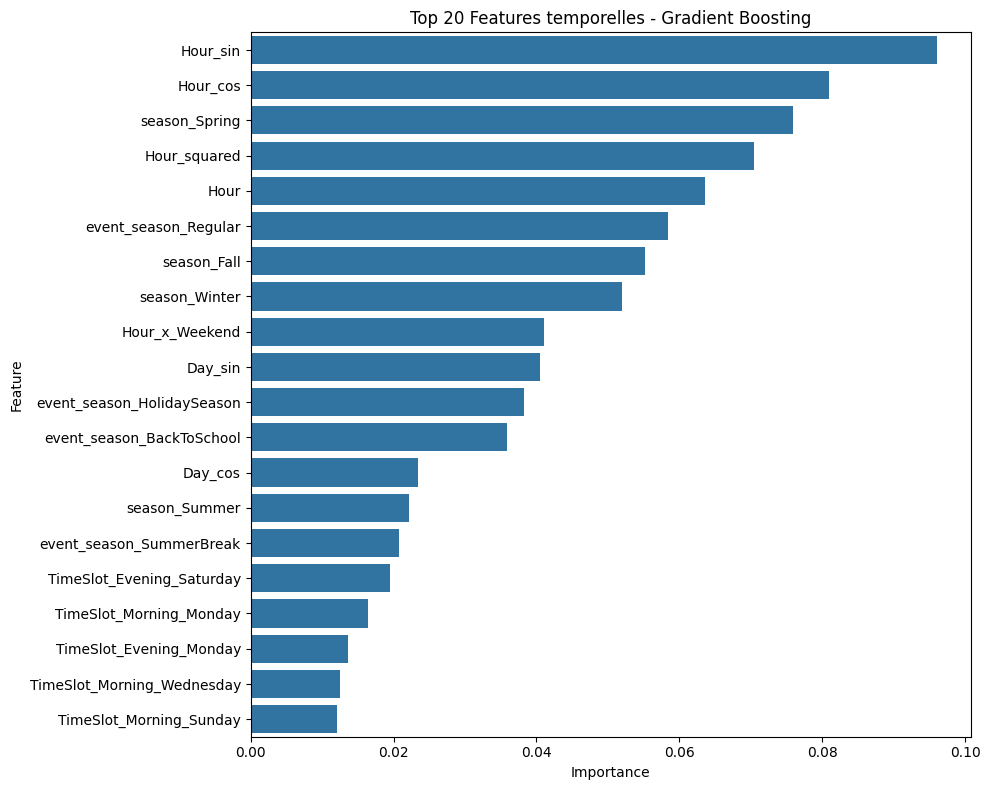

In [67]:
#Feature Importance

feature_names = numerical_cols + list(pipeline_boost.named_steps['preprocessor']
                                     .named_transformers_['cat']
                                     .named_steps['onehot'].get_feature_names_out(categorical_cols))

importances = pipeline_boost.named_steps['classifier'].feature_importances_
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20))
plt.title("Top 20 Features temporelles - Gradient Boosting")
plt.tight_layout()
plt.show()


D'après l'intérprétation des Feature importances : le moment précis dans la journée (Hour_sin) impacte fortement la performance + le saison "Hiver" (season_winter) est identifié comme un bon moment pour publier

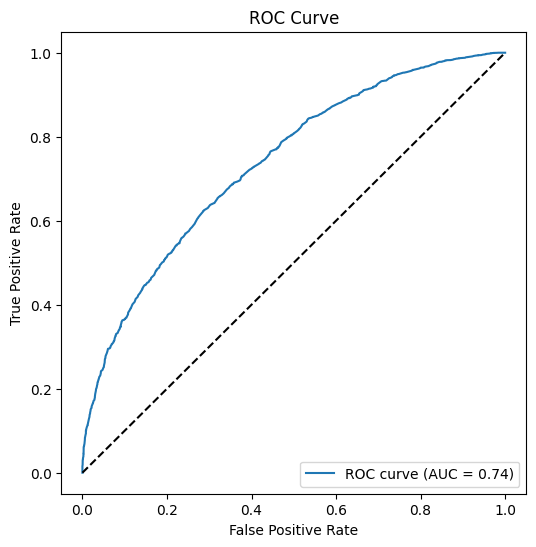

In [68]:
from sklearn.metrics import roc_curve, auc

# ROC Curve

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

--> plus la courbe est proche du coin supérieur gauche, meilleur est le modèle pour distinguer high vs low performance

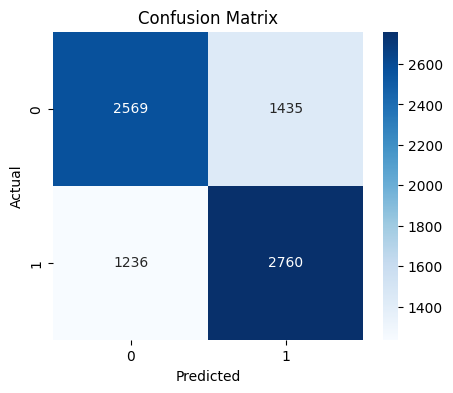

In [69]:

# Confusion Matrix Heatmap

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


True Negative - 2734 --> modèle a correctement prédit que la vidéo aurait faible performance


---


False Positive - 1114 -->Le modèle a prédit High , mais la vidéo était réellement Low


---


False Negative - 994 --> Le modèle a prédit Low, mais la vidéo était réellement High


---


True Positive - 3004 --> Le modèle a correctement prédit que la vidéo aurait une haute performance.

***CatBoost***

In [70]:
# ----------------------------
# CatBoost Classifier optimisé
# -----------------------------
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Dataset
df = pd.read_csv("balanced_youtube_shorts_tiktok_trends_2025.csv")

# Cible binaire
engagement_median = df['engagement_rate'].median()
df['performance'] = np.where(df['engagement_rate'] > engagement_median, 1, 0)

# Supprimer missing
temporal_features = ['upload_hour','publish_dayofweek','is_weekend','publish_period','season','event_season']
df = df.dropna(subset=temporal_features)

# Mapping jours
day2num = {'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}

# Features temporelles enrichies + interactions
df['Hour'] = df['upload_hour']
df['Hour_squared'] = df['upload_hour'] ** 2
df['Weekend'] = df['is_weekend']
df['Hour_x_Weekend'] = df['upload_hour'] * df['is_weekend']
df['Hour_sin'] = np.sin(2*np.pi*df['upload_hour']/24)
df['Hour_cos'] = np.cos(2*np.pi*df['upload_hour']/24)
df['Day_sin'] = df['publish_dayofweek'].map(day2num).apply(lambda x: np.sin(2*np.pi*x/7))
df['Day_cos'] = df['publish_dayofweek'].map(day2num).apply(lambda x: np.cos(2*np.pi*x/7))
df['TimeSlot'] = df['publish_period'] + "_" + df['publish_dayofweek']

# Nouvelles interactions
df['Hour_x_Day'] = df['upload_hour'] * df['publish_dayofweek'].map(day2num)
df['Hour_cos_x_Weekend'] = df['Hour_cos'] * df['Weekend']
df['Hour_bin'] = pd.cut(df['upload_hour'], bins=[0,6,12,18,24], labels=False)

# Colonnes
numerical_cols = ['Hour', 'Hour_squared', 'Weekend', 'Hour_x_Weekend', 'Hour_sin', 'Hour_cos',
                  'Day_sin', 'Day_cos', 'Hour_x_Day', 'Hour_cos_x_Weekend', 'Hour_bin']
categorical_cols = ['publish_period','season','event_season','TimeSlot']

X = df[numerical_cols + categorical_cols]
y = df['performance']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Modèle CatBoost
cat_model = CatBoostClassifier(
    iterations=2000,
    depth=10,
    learning_rate=0.025,
    l2_leaf_reg=7,
    subsample=0.85,
    rsm=0.8,
    bootstrap_type='Bernoulli',
    grow_policy='Lossguide',
    max_ctr_complexity=5,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=100
)

# Entraînement avec early stopping
cat_model.fit(
    X_train, y_train,
    cat_features=categorical_cols,
    eval_set=(X_test, y_test),
    early_stopping_rounds=150,
    verbose=100
)


0:	test: 0.5780175	best: 0.5780175 (0)	total: 446ms	remaining: 14m 51s
100:	test: 0.6774079	best: 0.6774079 (100)	total: 21s	remaining: 6m 34s
200:	test: 0.6950915	best: 0.6950915 (200)	total: 38.9s	remaining: 5m 48s
300:	test: 0.7022701	best: 0.7022701 (300)	total: 55.7s	remaining: 5m 14s
400:	test: 0.7088299	best: 0.7088299 (400)	total: 1m 12s	remaining: 4m 49s
500:	test: 0.7178367	best: 0.7178367 (500)	total: 1m 31s	remaining: 4m 32s
600:	test: 0.7244586	best: 0.7244586 (600)	total: 1m 51s	remaining: 4m 19s
700:	test: 0.7309753	best: 0.7309753 (700)	total: 2m 11s	remaining: 4m 4s
800:	test: 0.7360630	best: 0.7360630 (800)	total: 2m 30s	remaining: 3m 45s
900:	test: 0.7397006	best: 0.7397015 (899)	total: 2m 48s	remaining: 3m 25s
1000:	test: 0.7417320	best: 0.7417523 (996)	total: 3m 6s	remaining: 3m 6s
1100:	test: 0.7432695	best: 0.7432695 (1100)	total: 3m 24s	remaining: 2m 46s
1200:	test: 0.7447941	best: 0.7447941 (1200)	total: 3m 42s	remaining: 2m 27s
1300:	test: 0.7459080	best: 0.74

Evaluating

Optimized CatBoost Accuracy : 0.6833
Optimized CatBoost ROC AUC : 0.7500

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68      4004
           1       0.68      0.69      0.68      3996

    accuracy                           0.68      8000
   macro avg       0.68      0.68      0.68      8000
weighted avg       0.68      0.68      0.68      8000

Confusion Matrix:
 [[2725 1279]
 [1255 2741]]


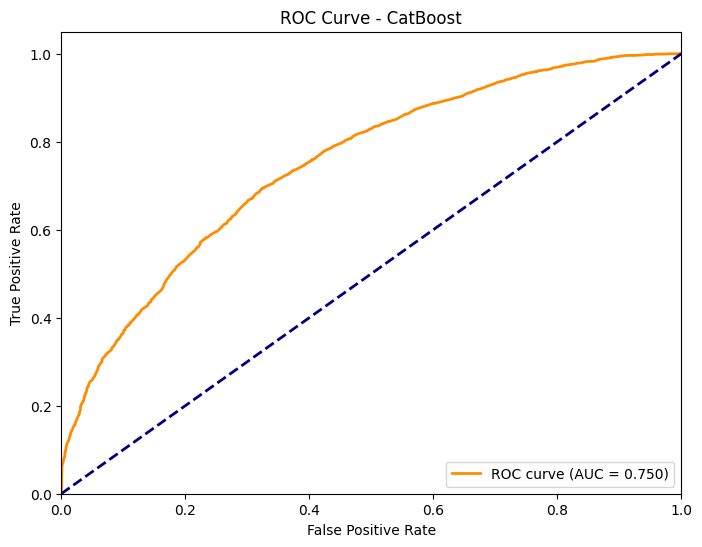

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc

# Prédictions
y_pred = cat_model.predict(X_test)
y_pred_proba = cat_model.predict_proba(X_test)[:,1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"Optimized CatBoost Accuracy : {accuracy:.4f}")
print(f"Optimized CatBoost ROC AUC : {auc_score:.4f}\n")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -----------------------------
# ROC Curve
# -----------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost')
plt.legend(loc="lower right")
plt.show()


Feature importance

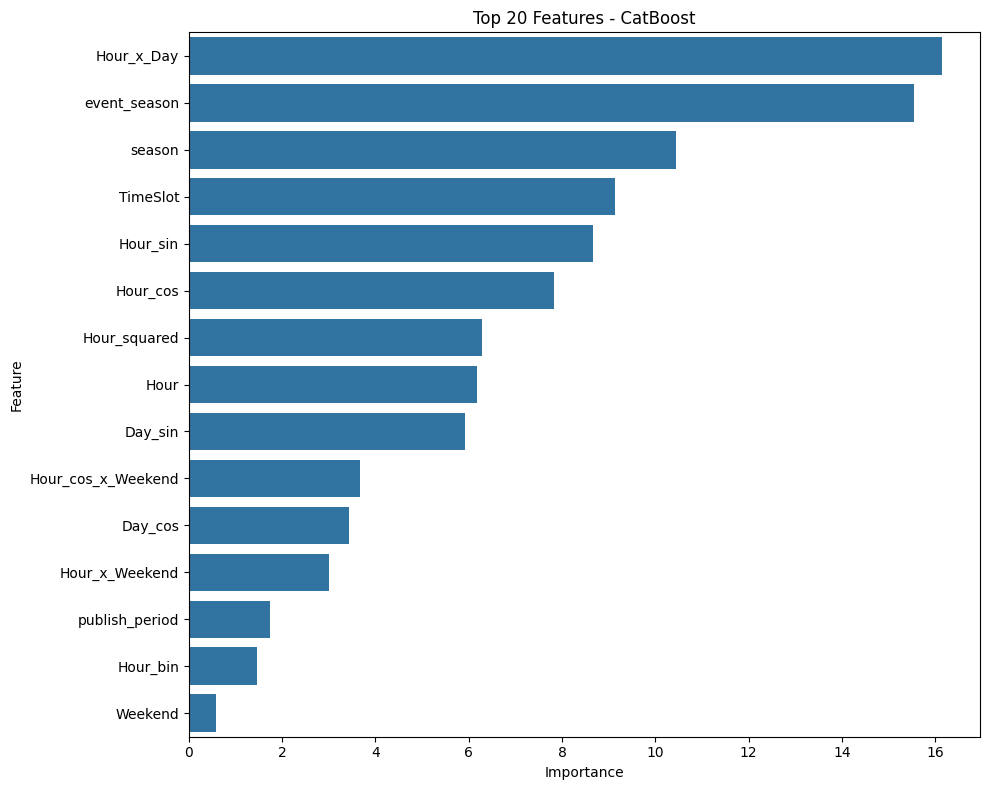

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Récupération des importances
importances = cat_model.get_feature_importance(prettified=True)
feat_imp_df = importances.rename(columns={'Feature Id':'Feature', 'Importances':'Importance'})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Top 20 features
plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20))
plt.title("Top 20 Features - CatBoost")
plt.tight_layout()
plt.show()


# ***BO1 : Prédiction des caractéristiques***

***RandomForest***

Accuracy (Test Set) : 0.8465

Classification Report :
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      4000
           1       1.00      0.69      0.82      4000

    accuracy                           0.85      8000
   macro avg       0.88      0.85      0.84      8000
weighted avg       0.88      0.85      0.84      8000


Confusion Matrix :
 [[3999    1]
 [1227 2773]]
Accuracy moyenne Cross-Validation : 0.8481250000000001


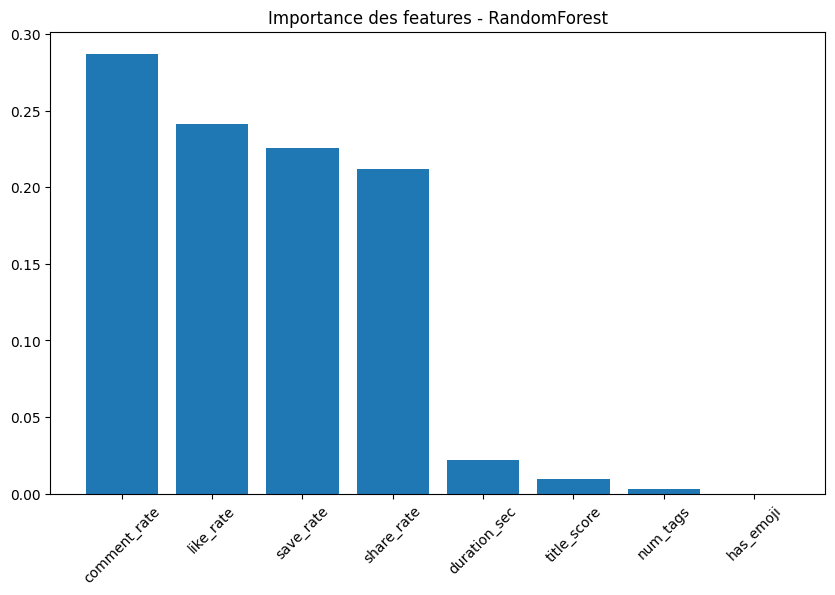

In [73]:
# --- Import des librairies ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# --- Chargement du dataset équilibré ---
df_balanced = pd.read_csv("balanced_youtube_shorts_tiktok_trends_2025.csv")

# --- Création de ratios pour features ---
def safe_divide(a, b):
    return np.where(b == 0, 0, a / b)

df_balanced['like_rate'] = safe_divide(df_balanced['likes'], df_balanced['views'])
df_balanced['comment_rate'] = safe_divide(df_balanced['comments'], df_balanced['views'])
df_balanced['share_rate'] = safe_divide(df_balanced['shares'], df_balanced['views'])
df_balanced['save_rate'] = safe_divide(df_balanced['saves'], df_balanced['views'])

# --- Vérifier/Créer la colonne has_emoji ---
if 'has_emoji' not in df_balanced.columns or df_balanced['has_emoji'].isnull().all():
    # On crée has_emoji depuis title_keywords
    df_balanced['has_emoji'] = df_balanced['title_keywords'].str.contains(r'[^\w\s]', regex=True).astype(int)

# --- Nouvelle cible 'is_trending' ---
df_balanced['trend_score'] = (df_balanced['views'] * df_balanced['engagement_rate']).fillna(0)
df_balanced['is_trending'] = np.where(df_balanced['trend_score'] > df_balanced['trend_score'].median(), 1, 0)

# --- Features sélectionnées ---
features = [
    'duration_sec', 'num_tags', 'title_score', 'has_emoji',
    'like_rate', 'comment_rate', 'share_rate', 'save_rate'
]
features = [col for col in features if col in df_balanced.columns]

X = df_balanced[features]
y = df_balanced['is_trending']

# --- Normalisation ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Train / Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# --- RandomForest ---
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_leaf=5,
    random_state=42
)
model.fit(X_train, y_train)

# --- Prédictions ---
y_pred = model.predict(X_test)

# --- Évaluation ---
print("Accuracy (Test Set) :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))

# --- Cross-validation ---
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Accuracy moyenne Cross-Validation :", cv_scores.mean())

# --- Importance des features ---
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Importance des features - RandomForest")
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.show()


####  Classification supervisée avec RandomForest
###### On crée une cible binaire is_trending pour prédire si une vidéo va devenir virale.
###### On utilise un RandomForestClassifier avec limitation de complexité pour éviter l’overfitting.
###### Évaluation via accuracy, classification report, confusion matrix et cross-validation.
###### Visualisation de l’importance des features pour identifier les variables les plus influentes.

***XGBoost***

In [74]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Score : 0.8477499999999999
Best Params : {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.7}

Accuracy : 0.905
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      4000
           1       0.96      0.84      0.90      4000

    accuracy                           0.91      8000
   macro avg       0.91      0.91      0.90      8000
weighted avg       0.91      0.91      0.90      8000

[[3865  135]
 [ 625 3375]]


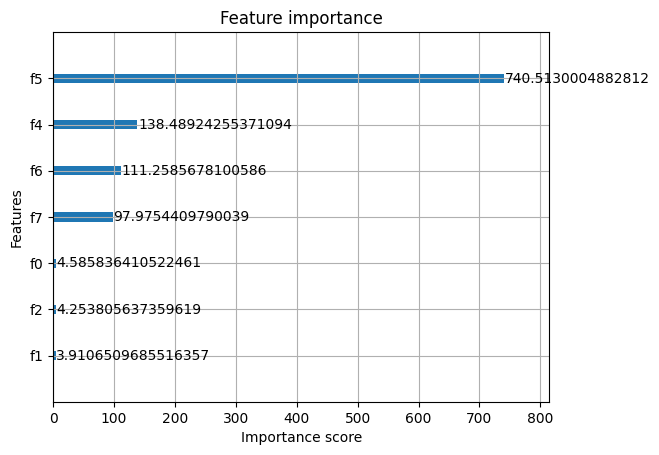

In [75]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import numpy as np

# --- Modèle de base ---
base_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

# --- GridSearch : paramètres optimisés ---
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
}

grid = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=1
)

# --- Exécution du GridSearch ---
grid.fit(X, y)

print("Best Score :", grid.best_score_)
print("Best Params :", grid.best_params_)

# --- Entraîner le meilleur modèle ---
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

# --- Prédictions ---
y_pred = best_model.predict(X_test)

print("\nAccuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Importance des features
xgb.plot_importance(best_model, importance_type="gain")
plt.show()


# ***BO2 : Prédiction des vidéos***

***Adaboost***

##Implementation du Adaboost



Data Science Goal :


*   Construire un modèle AdaBoost optimisé pour prédire efficacement la     viralité avec un ROC-AUC élevé et un Recall fort sur la classe "virale”
*   Maximiser le ROC-AUC  afin de mesurer la capacité du modèle à bien séparer les vidéos virales des autres


**Sélection et préparation des features**

In [76]:
# --- Import des librairies ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

# --- Création de ratios pour features ---
def safe_divide(a, b):
    return np.where(b == 0, 0, a / b)

df_balanced['like_rate'] = safe_divide(df_balanced['likes'], df_balanced['views'])
df_balanced['comment_rate'] = safe_divide(df_balanced['comments'], df_balanced['views'])
df_balanced['share_rate'] = safe_divide(df_balanced['shares'], df_balanced['views'])
df_balanced['save_rate'] = safe_divide(df_balanced['saves'], df_balanced['views'])

# --- Nouvelle cible 'is_trending' ---
df_balanced['trend_score'] = (df_balanced['views'] * df_balanced['engagement_rate']).fillna(0)
df_balanced['is_trending'] = np.where(df_balanced['trend_score'] > df_balanced['trend_score'].median(), 1, 0)

# --- Normalisation ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Dévision des données Train/Test**

In [77]:
# --- Train / Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

**Modélisation avec Adaboost**

In [78]:
# --- AdaBoost avec DecisionTree stump ---
estimator = DecisionTreeClassifier(max_depth=1)  # arbre faible
adaboost = AdaBoostClassifier(
    estimator=estimator,   # Remplacé base_estimator → estimator
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

# --- Entraînement ---
adaboost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

**Évaluation du modèle**

In [79]:
# --- Prédictions ---
y_pred = adaboost.predict(X_test)
y_proba = adaboost.predict_proba(X_test)[:,1]

# --- Évaluation ---
print("Accuracy (Test Set) :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("\nROC-AUC :", roc_auc_score(y_test, y_proba))
# --- Cross-validation ---
cv_scores = cross_val_score(adaboost, X_scaled, y, cv=5, scoring='accuracy')
print("Accuracy moyenne Cross-Validation :", cv_scores.mean())


Accuracy (Test Set) : 0.845875

Classification Report :
               precision    recall  f1-score   support

           0       0.76      1.00      0.87      4000
           1       1.00      0.69      0.82      4000

    accuracy                           0.85      8000
   macro avg       0.88      0.85      0.84      8000
weighted avg       0.88      0.85      0.84      8000


Confusion Matrix :
 [[3994    6]
 [1227 2773]]

ROC-AUC : 0.88512815625
Accuracy moyenne Cross-Validation : 0.846725


**Visualiser l’importance des features et la courbe ROC**

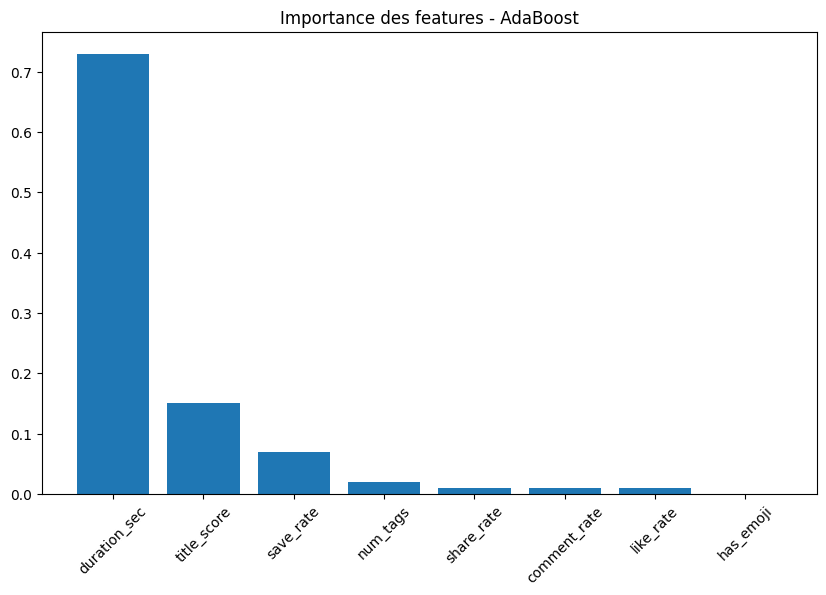

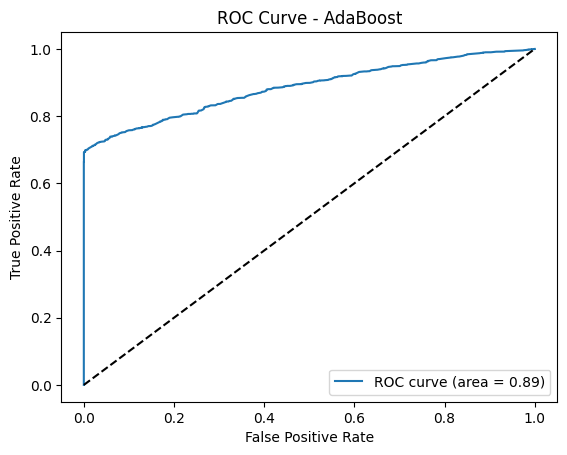

In [80]:
from sklearn.metrics import roc_curve

# --- Importance des features ---
importances = adaboost.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Importance des features - AdaBoost")
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.show()

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost')
plt.legend(loc='lower right')
plt.show()

**Matrice de confusion (Adaboost)**

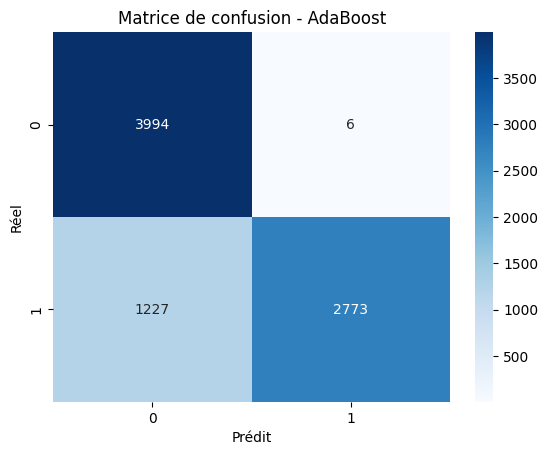

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - AdaBoost")
plt.show()

***Régression Multiple***

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


Sélection des features

In [83]:
features = [
    'duration_sec','likes','comments','shares','saves',
    'engagement_rate','engagement_velocity','dislikes',
    'comment_ratio','like_dislike_ratio','creator_avg_views',
    'avg_watch_time_sec','completion_rate','engagement_total',
    'like_rate','dislike_rate','share_rate','save_rate',
    'engagement_per_1k','trend_duration_days','title_score',
    'num_hashtags','num_tags'
]


Séparation des x et y Test/Train

In [84]:
X = df[features]
y = df['views_log']

Entrainement du Modèle

In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Résultat obtenu

In [86]:
print("\nCoefficients:\n", pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
}))

print("\nIntercept:", model.intercept_)



print("\nCoefficients:\n", pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
}))

print("\nIntercept:", model.intercept_)


Coefficients:
                 Feature   Coefficient
0          duration_sec -1.433027e-03
1                 likes -3.838987e-01
2              comments  1.186640e-01
3                shares  6.297739e-02
4                 saves  1.918042e-01
5       engagement_rate -3.131723e-02
6   engagement_velocity  1.496046e-05
7              dislikes  3.440794e-01
8         comment_ratio  3.132087e+04
9    like_dislike_ratio  1.059190e-03
10    creator_avg_views  7.243707e-07
11   avg_watch_time_sec  1.878770e-02
12      completion_rate -3.891492e-02
13     engagement_total  3.080514e-05
14            like_rate  3.131357e+04
15         dislike_rate -3.858616e+01
16           share_rate  3.131062e+04
17            save_rate  3.129870e+04
18    engagement_per_1k -3.131696e+01
19  trend_duration_days  7.574668e-03
20          title_score  2.803207e-03
21         num_hashtags  0.000000e+00
22             num_tags  1.151049e-02

Intercept: 10.620417419984333

Coefficients:
                 Feature  

# ***Système de recommendation***

**Import et préparation des librairies**

In [87]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Oumar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

**Analyse sentimentale**



*   Calcul d’un score de sentiment pour chaque vidéo
*   Utile pour intégrer le sentiment des commentaires dans le système de recommandation


In [88]:
sia = SentimentIntensityAnalyzer()

# Exemple : utiliser les commentaires ou à défaut le titre pour le sentiment
df['sentiment_score'] = df['comments'].fillna(df['title_score'].astype(str)).apply(
    lambda x: sia.polarity_scores(str(x))['compound']
)

**Clustering**

In [89]:
features = [
    "views","likes","comments","shares","saves","dislikes",
    "engagement_total","engagement_rate","engagement_velocity",
    "engagement_per_1k","like_rate","dislike_rate","share_rate",
    "save_rate","comment_ratio","like_dislike_ratio","avg_watch_time_sec",
    "completion_rate","duration_sec","trend_duration_days","views_log",
    "likes_scaled","comments_scaled","shares_scaled",
    "sentiment_score"  # ajout de la feature sentiment
]

scaler = StandardScaler()
X = scaler.fit_transform(df[features])

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster_label'] = kmeans.fit_predict(X)


**Naive Bayes  Classification supervisée**



*   Utilisation de Naive Bayes pour prédire la performance d’une vidéo (High / Medium / Low)
*   Le cluster_label est ajouté comme feature pour améliorer la prédiction



In [90]:
X_cls = df[features + ['cluster_label']]
y_cls = df['performance']  # High / Medium / Low

clf = GaussianNB()
clf.fit(X_cls, y_cls)


GaussianNB()

**Système de recommandation basé sur similarité**

Intègrer le sentiment et le clustering pour enrichir les recommandations

In [91]:
nbrs = NearestNeighbors(n_neighbors=11, metric='cosine').fit(X)

def recommend(video_index, top_n=10):
    distances, indices = nbrs.kneighbors([X[video_index]])
    indices = indices.flatten()[1:top_n+1]  # exclure la vidéo cible
    scores = 1 - distances.flatten()[1:top_n+1]  # transformer distance en similarité

    recommendations = df.iloc[indices].copy()
    recommendations["similarity_score"] = scores

    # Prédire la performance des vidéos recommandées
    X_recs = recommendations[features + ['cluster_label']]
    recommendations["predicted_performance"] = clf.predict(X_recs)

    recommendations = recommendations.sort_values(by="similarity_score", ascending=False)
    return recommendations[['title_score','author_handle','similarity_score','predicted_performance','sentiment_score']]


**Exemple d’utilisation du système de recommandation**



*   Tester le système sur une vidéo cible
*   Affiche le Top 10 recommandations avec similarité, performance prédite et sentiment



In [92]:
video_index = 0
top_recs = recommend(video_index)
print(top_recs)

       title_score   author_handle  similarity_score  predicted_performance  \
17912           22    BeautyByLiam          1.000000                      1   
206             22    BeautyByLiam          1.000000                      1   
0               22    BeautyByLiam          1.000000                      1   
2201            20  DailyVlogsYuki          0.864291                      1   
20391           17      StreetLabs          0.820660                      0   
20940           17      StreetLabs          0.820660                      0   
20706           17      StreetLabs          0.820660                      0   
38225           17      StreetLabs          0.820660                      0   
32308           17      StreetLabs          0.820660                      0   
20328           17      StreetLabs          0.820660                      0   

       sentiment_score  
17912              0.0  
206                0.0  
0                  0.0  
2201               0.0  
20391

**Évaluation du modèle de classification**



*   Évaluer la performance du modèle Naive Bayes
*   Permet d’ajuster les paramètres ou d’améliorer le modèle si besoin avant de l’intégrer dans le système de recommandation



In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report :")
print(classification_report(y_test, y_pred))


Confusion Matrix :
[[3778  212]
 [ 708 3302]]

Classification Report :
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3990
           1       0.94      0.82      0.88      4010

    accuracy                           0.89      8000
   macro avg       0.89      0.89      0.88      8000
weighted avg       0.89      0.89      0.88      8000

